<a href="https://colab.research.google.com/github/aparnamohankumar18/AUTOMOBILE/blob/main/hotel_code_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [4]:
pip install imblearn

In [5]:
url = 'https://raw.githubusercontent.com/aparnamohankumar18/hotel_booking/main/hotel_bookings_raw.csv'
hotelBook = pd.read_csv(url)

In [6]:
hotelBook.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  INFLATION  \
0                        0                     0       2  ...        1.8   
1                        0                     0       2  ...        1.8   
2                        0                     1       1  ...        1.8   
3                        0                     1       1  ...        1.8   
4                        0                     2       2  ...        1.8   

   INFLATION_CHG CSMR_SENT UNRATE INTRSRT       GDP  FUEL_PRCS  CPI_HOTELS  \
0            0.0      93.1    5.3    0.75  18306.96      194.0    0.187566   
1            0.0      93.1    5.3    0.75  18306.96      194.0    0.187566   
2            0.0      93.1    5.3    0.75  18306.96      194.0    0.187566   
3            0.0      93.1    5.3    0.75  18306.96      194.0    0.187566   
4            0.0      93.1    5.3    0.75  18306.96      194.0    0.187566   

   US_GINI  DIS_INC  
0     41.2  41355.0  
1     41.2  41355.0  
2     41.2  41355.0  
3     41.2  41355.0  
4     41.2  41355.0  

[5 rows x 43 columns]

In [7]:
hotelBook.shape

(119390, 43)

In [8]:
hotelBook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotelBook.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','country'], inplace=True)

In [10]:
hotelBook.isnull().sum()
# 16340 null values in agent.
# 181 null values in CPI_AVG, INFLATION, INFLATION_CHG, CSMR_SENT, UNRATE, INTRSRT, GDP, FUEL_PRCS, CPI_HOTELS, US_GINI, DIS_INC.

hotel                                 0
is_canceled                           0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0


In [11]:
hotelBook['children'] = hotelBook['children'].fillna(value = 0) # most common value in children.

In [12]:
index_i = hotelBook[ hotelBook['MO_YR'] == '11-2014'].index
hotelBook.drop( index_i, inplace = True)

# Only one data record for this date and MO_YR hence can be considered an outlier data point and removed. Record with null value will be removed.

In [13]:
index_j = hotelBook[ hotelBook['MO_YR'] == '10-2014'].index
hotelBook.drop( index_j, inplace = True)

# These records lie at the beginning of the dateline of the dataset hence we cannot extrapolate these values, we have to drop these data records.

In [14]:
hotelBook.shape

(119209, 38)

In [15]:
hotelBook.nunique()

# hotel, is_canceled, children, babies, meal, market_segment, distribution channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, customer_type, required_car_parking_spaces, total_of_special_requests, reservation_status, INFLATION_CHG, INTRSRT, US_GINI are categorical.(Taking <6 values)
# lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking changes, agent, days_in_waiting_list, adr, reservation_status_date, CPI_AVG, INFLATION, CSMR_SENT, UNRATE, GDP, FUEL_PRCS, CPI_HOTELS, DIS_INC are numeric.(int or float)

hotel                                2
is_canceled                          2
lead_time                          479
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              14
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status                   3
reservation_status_date  

In [16]:
# Converting object to categories.

hotelBook["hotel"] = hotelBook["hotel"].astype("category")
hotelBook["is_canceled"] = hotelBook["is_canceled"].astype("bool")
hotelBook["babies"] = hotelBook["babies"].astype("category")
hotelBook["meal"] = hotelBook["meal"].astype("category")
hotelBook["market_segment"] = hotelBook["market_segment"].astype("category")
hotelBook["distribution_channel"] = hotelBook["distribution_channel"].astype("category")
hotelBook["is_repeated_guest"] = hotelBook["is_repeated_guest"].astype("bool")
hotelBook["reserved_room_type"] = hotelBook["reserved_room_type"].astype("category")
hotelBook["assigned_room_type"] = hotelBook["assigned_room_type"].astype("category")
hotelBook["deposit_type"] = hotelBook["deposit_type"].astype("category")
hotelBook["customer_type"] = hotelBook["customer_type"].astype("category")
hotelBook["reservation_status"] = hotelBook["reservation_status"].astype("category")

hotelBook["reservation_status_date"] = hotelBook["reservation_status_date"].astype("category")
hotelBook["MO_YR"] = hotelBook["MO_YR"].astype("category")

In [17]:
# Converting Hotel to int data type for heatmap
hotelBook['hotel'] = hotelBook['hotel'].apply(lambda x: 0 if x=='Resort Hotel' else 1)
hotelBook['hotel'] = hotelBook['hotel'].astype(bool)

In [18]:
hotelBook["children"] = hotelBook["children"].astype("int")

In [19]:
hotelBook['is_canceled'].value_counts()

False    75166
True     44043
Name: is_canceled, dtype: int64

* Imbalance in the target variable.

In [20]:
hotelBook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119209 non-null  bool    
 1   is_canceled                     119209 non-null  bool    
 2   lead_time                       119209 non-null  int64   
 3   stays_in_weekend_nights         119209 non-null  int64   
 4   stays_in_week_nights            119209 non-null  int64   
 5   adults                          119209 non-null  int64   
 6   children                        119209 non-null  int64   
 7   babies                          119209 non-null  category
 8   meal                            119209 non-null  category
 9   market_segment                  119209 non-null  category
 10  distribution_channel            119209 non-null  category
 11  is_repeated_guest               119209 non-null  bool    
 12  pr

In [21]:
hotelBook.describe().T

count          mean         std  \
lead_time                       119209.0    103.730306  106.697043   
stays_in_weekend_nights         119209.0      0.928999    0.998720   
stays_in_week_nights            119209.0      2.501053    1.909634   
adults                          119209.0      1.856185    0.579674   
children                        119209.0      0.104044    0.398837   
previous_cancellations          119209.0      0.085564    0.842045   
previous_bookings_not_canceled  119209.0      0.137305    1.498564   
booking_changes                 119209.0      0.221460    0.652744   
agent                           102869.0     86.841838  110.812868   
days_in_waiting_list            119209.0      2.324673   17.607841   
adr                             119209.0    101.890911   50.550498   
required_car_parking_spaces     119209.0      0.062613    0.245465   
total_of_special_requests       119209.0      0.572230    0.793087   
CPI_AVG                         119209.0    240.780652    2.691831   
INFLATION                       119209.0      2.043988    0.203388   
INFLATION_CHG                   119209.0     -0.008392    0.095700   
CSMR_SENT                       119209.0     93.093092    3.272362   
UNRATE                          119209.0      4.827968    0.279105   
INTRSRT                         119209.0      1.120033    0.301925   
GDP                             119209.0  18796.312904  401.008690   
FUEL_PRCS                       119209.0    157.648724   21.373932   
CPI_HOTELS                      119209.0      0.177324    0.023984   
US_GINI                         119209.0     41.151516    0.049977   
DIS_INC                         119209.0  41970.477321  426.739880   

                                         min           25%           50%  \
lead_time                           0.000000     18.000000     69.000000   
stays_in_weekend_nights             0.000000      0.000000      1.000000   
stays_in_week_nights                0.000000      1.000000      2.000000   
adults                              0.000000      2.000000      2.000000   
children                            0.000000      0.000000      0.000000   
previous_cancellations              0.000000      0.000000      0.000000   
previous_bookings_not_canceled      0.000000      0.000000      0.000000   
booking_changes                     0.000000      0.000000      0.000000   
agent                               1.000000      9.000000     14.000000   
days_in_waiting_list                0.000000      0.000000      0.000000   
adr                                -6.380000     69.530000     94.960000   
required_car_parking_spaces         0.000000      0.000000      0.000000   
total_of_special_requests           0.000000      0.000000      0.000000   
CPI_AVG                           234.747000    238.033000    240.545000   
INFLATION                           1.600000      1.900000      2.100000   
INFLATION_CHG                      -0.200000     -0.100000      0.000000   
CSMR_SENT                          87.200000     91.000000     93.100000   
UNRATE                              4.300000      4.700000      4.900000   
INTRSRT                             0.750000      1.000000      1.000000   
GDP                             17991.348000  18425.306000  18775.459000   
FUEL_PRCS                         113.400000    149.800000    161.100000   
CPI_HOTELS                          0.107059      0.165677      0.183547   
US_GINI                            41.100000     41.100000     41.200000   
DIS_INC                         41182.000000  41680.000000  41850.000000   

                                         75%           max  
lead_time                         160.000000    737.000000  
stays_in_weekend_nights             2.000000     19.000000  
stays_in_week_nights                3.000000     50.000000  
adults                              2.000000     55.000000  
children                            0.000000     10.000000  
previous_cancella

In [22]:
hotelBook.describe(include=['category','bool']).T

count unique         top    freq
hotel                    119209      2        True   79150
is_canceled              119209      2       False   75166
babies                   119209      5           0  118292
meal                     119209      5          BB   92129
market_segment           119209      8   Online TA   56477
distribution_channel     119209      5       TA/TO   97689
is_repeated_guest        119209      2       False  115579
reserved_room_type       119209     10           A   85813
assigned_room_type       119209     12           A   73872
deposit_type             119209      3  No Deposit  104460
customer_type            119209      4   Transient   89612
reservation_status       119209      3   Check-Out   75166
reservation_status_date  119209    924  10/21/2015    1461
MO_YR                    119209     33     10-2015    5742

- is_canceled (TARGET)
- lead_time - Ranges between 0 and 737, mean>median data is right-skewed.
- arrival_date_year - since we have MO_YR, this column is redundant. Can be dropped.
- arrival_date_week_number - Ranges between 1 and 53, data is approx normal. Can be dropped.
- arrival_date_day_of_month - Ranges between 1 and 31, data is approx normal. Can be dropped.
- stays_in_weekend_nights - Ranges between 0 and 19, data is approx normal.
- stays_in_week_nights - Ranges between 0 and 50, data is approx normal.
- adults - Numbers between 0 and 55.
- children - Numbers between 0 and 10.
- babies - Numbers between 0 and 10.
- is_repeated_guest - Values can be 0 and 1.
- previous_cancellations - Values range from 0 to 26. Mostly 0, some values are high.
- previous_bookings_not_canceled - Values range from 0 to 72. Mostly 0, a few have high number of changes.
- booking_changes - Values range from 0 to 21. Mostly 0, a few high numbers.
- agent - Many missing values. Mean>median, data is right skewed.
- days_in_waiting_list - Range from 0 to 391. Mostly 0.
- adr - Range -6 to 5400.
- required_car_parking_spaces - Range from 0 to 8. Mostly 0.
- total_of_special_requests - Range from 0 to 5. Mostly 0.
- CPI_AVG - Some missing values. Range between 234.747 and 246.435. Some missing values.
- INFLATION - Some missing values. Range between 1.6 and 2.3.
- INFLATION_CHG - Some missing values. Range between -0.2 and 0.1.
- CSMR_SENT - Some missing values. Range between 87.2 and 93.5.
- UNRATE - Some missing values. Range between 4.3 and 5.7.
- INTRSRT - Some missing values. Range between 0.75 and 1.75.
- GDP - Some missing values. Ranges between 17991.348 and 19561.896.
- FUEL_PRCS - Some missing values. Ranges between 113.4 and 204.2.
- CPI_HOTELS - Some missing values. Ranges between 0.107059 and 0.236504.
- US_GINI - Some missing values. Range from 41.1 to 41.2. Mean< median, data is left skewed.
- DIS_INC - Some missing values. Range between 41182 and 42834. Approx Normal distribution.


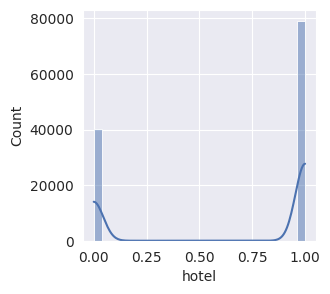

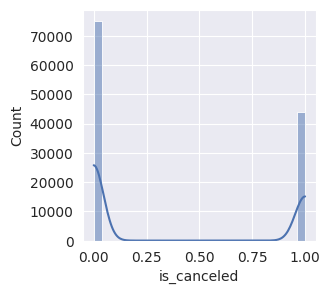

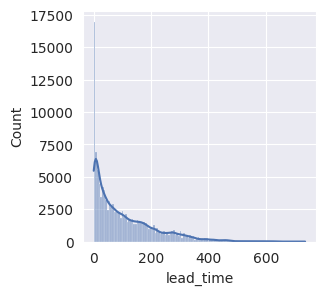

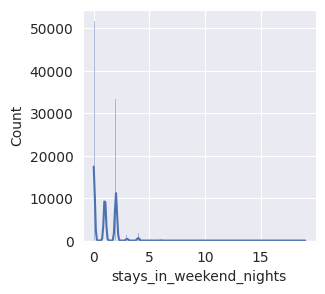

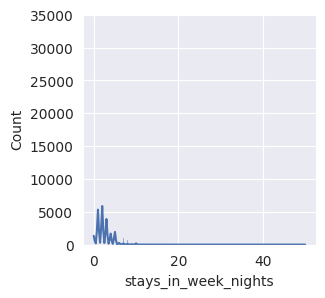

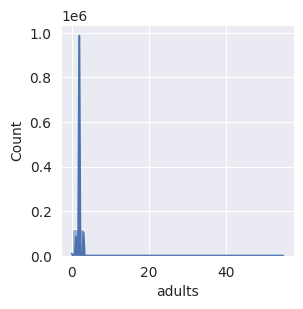

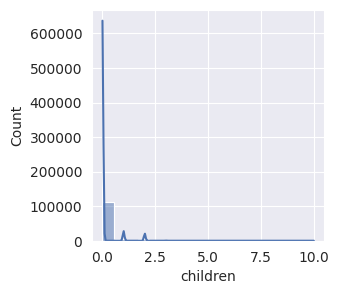

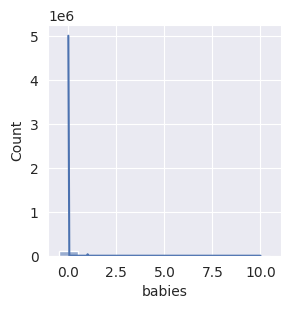

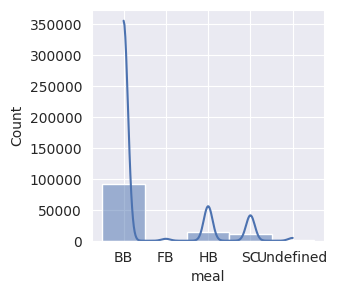

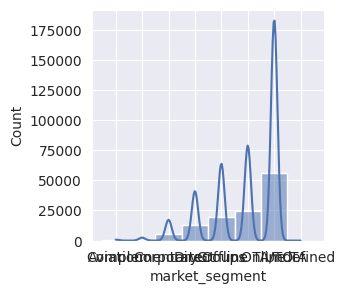

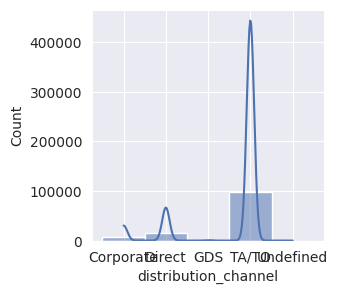

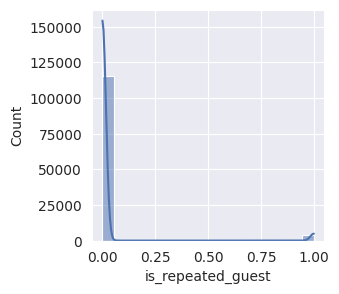

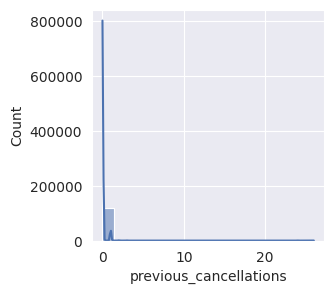

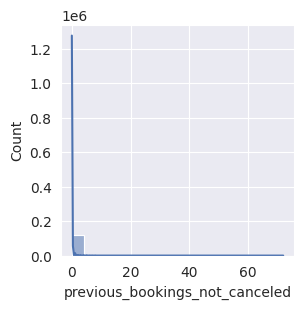

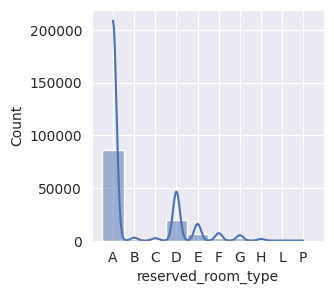

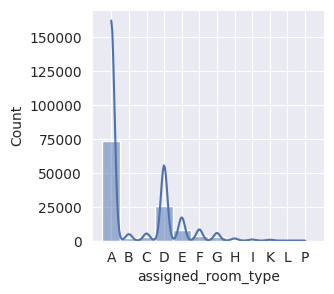

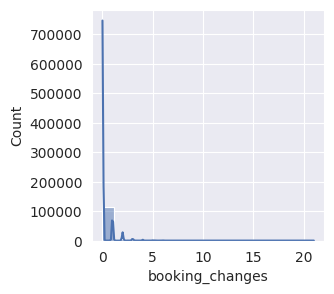

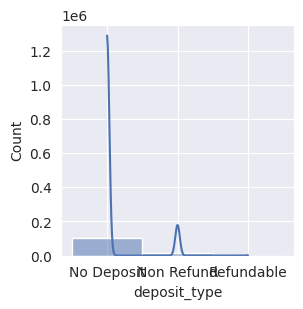

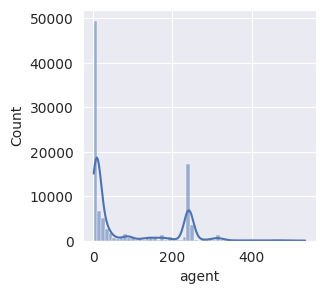

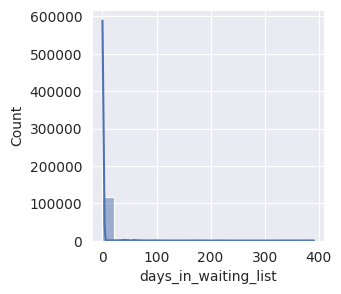

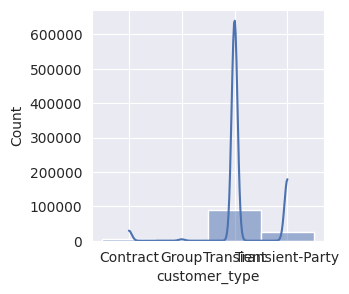

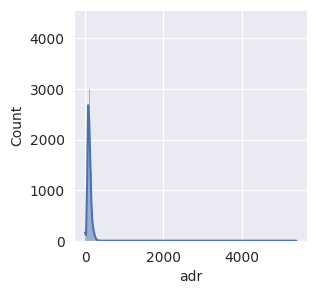

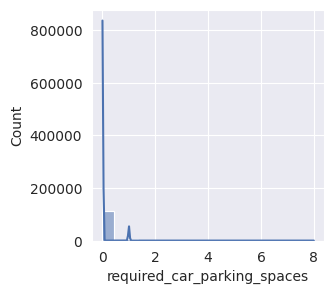

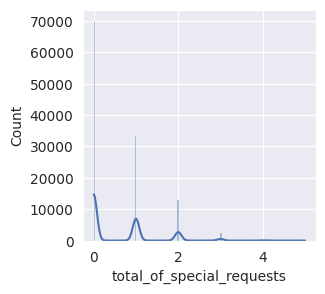

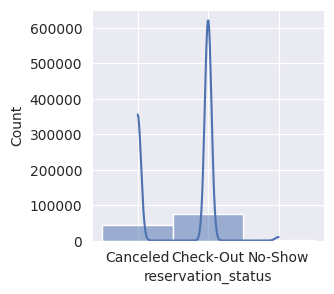

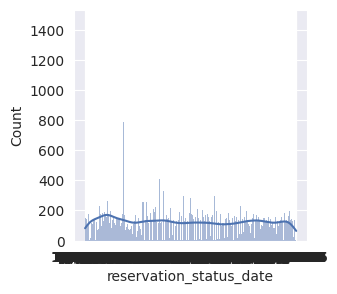

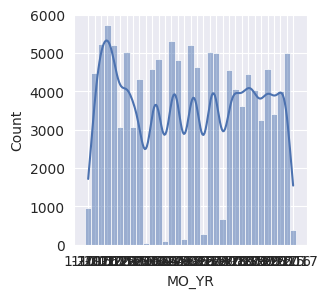

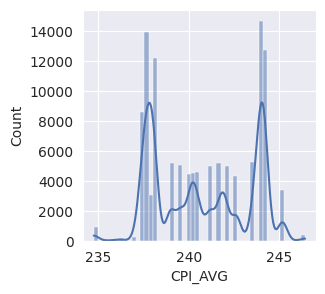

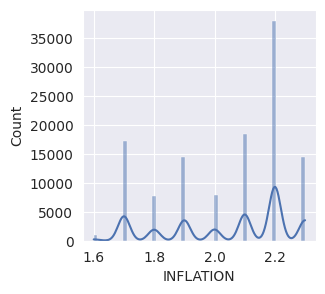

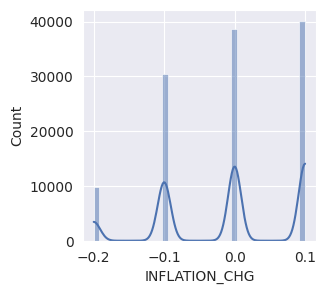

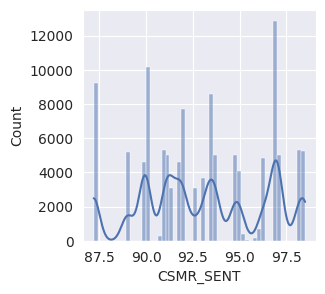

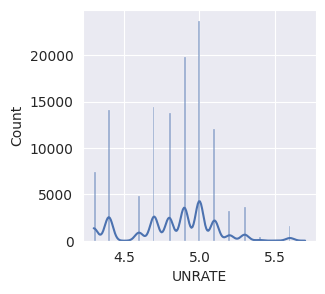

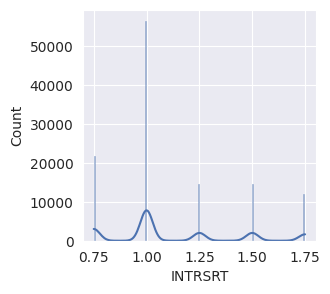

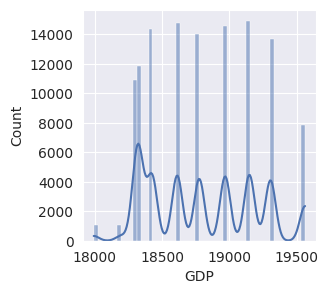

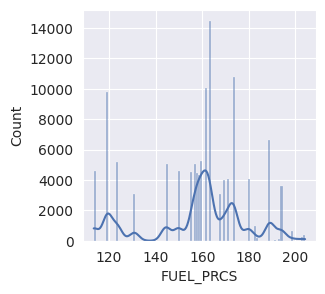

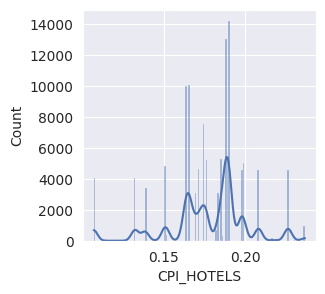

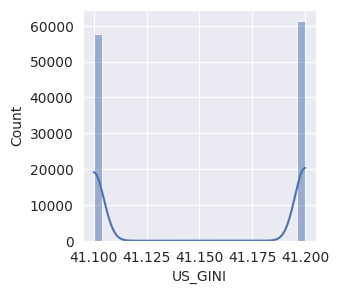

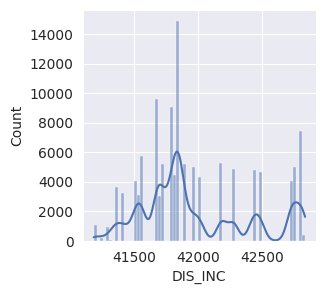

In [23]:
# Let us plot all the columns to look at their distributions

import seaborn as sns
for i in hotelBook.columns:
    sns.set({'figure.figsize': (3,3)})
    sns.histplot(hotelBook[i], kde=True)
    plt.show()

* hotel - Resort, City. Unbalanced target variable.
* is_canceled - 0,1. Unbalanced.
* lead_time - Data has right skew.


In [24]:
hotelBook.is_canceled.value_counts()
# Some imbalance in the target variable.

False    75166
True     44043
Name: is_canceled, dtype: int64

In [25]:
hotelBook.lead_time.value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

In [26]:
hotelBook.stays_in_weekend_nights.value_counts()
# Mostly 0, 1, 2.

0     51818
2     33308
1     30625
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [27]:
hotelBook.stays_in_week_nights.value_counts()
# Mostly 0, 1, 2, 3, 4, 5, 6, 7, 10.

2     33504
1     30310
3     22257
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [28]:
hotelBook.adults.value_counts()
# Mostly 1, 2, 3. Can consider all others as outliers.

2     89499
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [29]:
hotelBook.children.value_counts()
# Mostly 0, 1, 2. 93% values are 0. Convert float to integer. Consider all others as outliers.
# Drop the column.

0     110619
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

In [30]:
hotelBook.drop('children', axis = 1, inplace = True)
#Drop column: children.

In [31]:
hotelBook.babies.value_counts()
# Mostly 0 others may be outliers. Column can be dropped.

0     118292
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [32]:
hotelBook.drop(columns=['babies'], inplace = True)
#Drop column: babies.

In [33]:
hotelBook.shape

(119209, 36)

In [34]:
hotelBook.meal.value_counts()
# FB less than 1% valuecount. More than 77% BB.

BB           92129
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [35]:
hotelBook.market_segment.value_counts()
# Complementary, Aviation and Undefined are outliers.

Online TA        56477
Offline TA/TO    24219
Groups           19631
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [36]:
hotelBook.distribution_channel.value_counts()
# 88% is TA/TO. GDS, Undefined is less than 1%.

TA/TO        97689
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [37]:
hotelBook.is_repeated_guest.value_counts()
# Maybe drop this unbalanced column.

False    115579
True       3630
Name: is_repeated_guest, dtype: int64

In [38]:
hotelBook.previous_cancellations.value_counts()
# 94.5% data is 0, highly imbalanced. Column can be dropped.

0     112905
1       5873
2        115
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
Name: previous_cancellations, dtype: int64

In [39]:
hotelBook.drop(columns=['previous_cancellations'], inplace = True)
#Drop column: PREVOIUS_CANCELLATIONS.

In [40]:
hotelBook.previous_bookings_not_canceled.value_counts()
# 97% of data is 0. Highly imbalanced. Drop the column.

0     115589
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [41]:
hotelBook.drop(columns=['previous_bookings_not_canceled'], inplace = True)
#Drop column: previous_bookings_not_canceled.

In [42]:
hotelBook.reserved_room_type.value_counts()
# A and D are the most common values.

A    85813
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [43]:
hotelBook.assigned_room_type.value_counts()

A    73872
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [44]:
# Data leakage as assigned changes from reserved only on check in
hotelBook.drop(columns=['assigned_room_type'], inplace = True)
#Drop column: assigned_room_type.

In [45]:
hotelBook.booking_changes.value_counts()
# Mostly 0, 1, 2. Rest are mostly outliers.

0     101133
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [46]:
hotelBook.deposit_type.value_counts()

No Deposit    104460
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [47]:
hotelBook.agent.value_counts()

9.0      31961
240.0    13921
1.0       7011
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [48]:
hotelBook.drop(columns=['agent'], inplace = True)
#Drop column: agent.

In [49]:
hotelBook.days_in_waiting_list.value_counts()
#Mostly 0, highly imbalanced. Drop the column.

0      115511
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [50]:
hotelBook.drop(columns=['days_in_waiting_list'], inplace = True)
#Drop column: days_in_waiting_list.

In [51]:
hotelBook.customer_type.value_counts()

Transient          89612
Transient-Party    24944
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [52]:
hotelBook.adr.value_counts()
# Numeric variable has a peak around 62.

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1958
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64

In [53]:
hotelBook.required_car_parking_spaces.value_counts()
# 93% values are 0, Drop the column.

0    111793
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [54]:
hotelBook.drop(columns=['required_car_parking_spaces'], inplace = True)
#Drop column: required_car_parking_spaces.

In [55]:
hotelBook.total_of_special_requests.value_counts()

0    70137
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [56]:
hotelBook.reservation_status.value_counts()
# Drop the column. Cannot be used due to risk of future leakage

Check-Out    75166
Canceled     42836
No-Show       1207
Name: reservation_status, dtype: int64

In [57]:
hotelBook.drop(columns=['reservation_status'], inplace = True)
#Drop column: reservation_status.

In [58]:
hotelBook.reservation_status_date.value_counts()
# Drop the column, with reservation_status.

10/21/2015    1461
7/6/2015       805
11/25/2016     790
1/1/2015       763
1/18/2016      625
              ... 
4/25/2015        1
3/5/2015         1
4/21/2015        1
1/29/2015        1
1/28/2015        1
Name: reservation_status_date, Length: 924, dtype: int64

In [59]:
hotelBook.drop(columns=['reservation_status_date'], inplace = True)
#Drop column: reservation_status_date.

In [60]:
hotelBook.MO_YR.value_counts()
# Represents a datetime variable, drop the column, unless doing a time-stratified split for test and training data..

10-2015    5742
3-2016     5319
1-2017     5251
10-2016    5221
4-2016     5214
5-2016     5023
11-2016    5021
5-2017     5006
9-2016     4993
2-2017     4858
3-2017     4826
4-2017     4634
2-2016     4596
8-2016     4585
6-2016     4552
1-2016     4482
7-2016     4453
12-2016    4338
6-2017     4060
7-2017     4038
9-2015     4017
7-2015     3615
8-2017     3417
8-2015     3247
11-2015    3077
12-2015    3062
1-2015      948
6-2015      666
9-2017      393
5-2015      275
4-2015      151
3-2015       85
2-2015       44
Name: MO_YR, dtype: int64

In [61]:
hotelBook.drop(columns=['MO_YR'], inplace = True)
#Drop column: MO_YR.

In [62]:
hotelBook.CPI_AVG.value_counts()

237.733    5742
238.080    5319
243.618    5251
241.741    5221
238.992    5214
239.557    5023
242.026    5021
244.004    5006
241.176    4993
244.006    4858
243.892    4826
244.193    4634
237.336    4596
240.545    4585
240.222    4552
237.652    4482
240.101    4453
242.637    4338
244.163    4060
244.243    4038
237.498    4017
238.034    3615
245.183    3417
238.033    3247
238.017    3077
237.761    3062
234.747     948
237.657     666
246.435     393
237.001     275
236.222     151
235.976      85
235.342      44
Name: CPI_AVG, dtype: int64

In [63]:
hotelBook.INFLATION.value_counts()

2.2    38018
2.1    18518
1.7    17233
2.3    14432
1.9    14393
2.0     7903
1.8     7764
1.6      948
Name: INFLATION, dtype: int64

In [64]:
hotelBook.INFLATION_CHG.value_counts()

 0.1    40174
 0.0    38689
-0.1    30514
-0.2     9832
Name: INFLATION_CHG, dtype: int64

In [65]:
hotelBook.CSMR_SENT.value_counts()

90.0    10195
87.2     9238
91.0     5319
98.5     5251
89.0     5214
94.7     5023
93.8     5021
97.1     5006
91.2     4993
96.3     4858
96.9     4826
97.0     4634
91.7     4596
89.8     4585
93.5     4552
92.0     4482
98.2     4338
95.0     4060
93.4     4038
93.1     3615
96.8     3417
91.9     3247
91.3     3077
92.6     3062
98.1      948
96.1      666
95.1      393
90.7      275
95.9      151
93.0       85
95.4       44
Name: CSMR_SENT, dtype: int64

In [66]:
hotelBook.UNRATE.value_counts()

5.0    23736
4.9    19786
4.7    14447
4.4    14093
4.8    13733
5.1    12102
4.3     7455
4.6     4826
5.3     3615
5.2     3247
5.6     1614
5.4      426
5.5       85
5.7       44
Name: UNRATE, dtype: int64

In [67]:
hotelBook.INTRSRT.value_counts()

1.00    56521
0.75    21867
1.50    14466
1.25    14447
1.75    11908
Name: INTRSRT, dtype: int64

In [68]:
hotelBook.GDP.value_counts()

19148.194    14935
18611.617    14789
18968.041    14580
18425.306    14397
18775.459    14031
19304.506    13700
18332.079    11881
18306.960    10879
19561.896     7848
18193.707     1092
17991.348     1077
Name: GDP, dtype: int64

In [69]:
hotelBook.FUEL_PRCS.value_counts()

173.5    5742
119.4    5319
161.1    5251
159.7    5221
123.6    5214
144.4    5023
157.0    5021
173.6    5006
163.1    4993
163.5    4858
161.3    4826
162.9    4634
113.4    4596
149.8    4585
155.4    4552
119.2    4482
157.6    4453
158.8    4338
171.5    4060
179.6    4038
169.4    4017
194.0    3615
188.9    3417
189.2    3247
167.4    3077
130.8    3062
182.6     948
198.7     666
204.2     393
202.6     275
183.8     151
193.1      85
191.5      44
Name: FUEL_PRCS, dtype: int64

In [70]:
hotelBook.CPI_HOTELS.value_counts()

0.189821    5742
0.185239    5319
0.165677    5251
0.189165    5221
0.176265    5214
0.198447    5023
0.163833    5021
0.163111    5006
0.187797    4993
0.165754    4858
0.150883    4826
0.171406    4634
0.197319    4596
0.207975    4585
0.226075    4552
0.189989    4482
0.188348    4453
0.174506    4338
0.132339    4060
0.107059    4038
0.189481    4017
0.187566    3615
0.138513    3417
0.174096    3247
0.183547    3077
0.169333    3062
0.236504     948
0.182534     666
0.151972     393
0.185620     275
0.216699     151
0.218614      85
0.230077      44
Name: CPI_HOTELS, dtype: int64

In [71]:
hotelBook.US_GINI.value_counts()

41.2    61412
41.1    57797
Name: US_GINI, dtype: int64

In [72]:
hotelBook.DIS_INC.value_counts()
# Should replace NA values with something.

41560.0    5742
41829.0    5319
42182.0    5251
41884.0    5221
41727.0    5214
41680.0    5023
41952.0    5021
42742.0    5006
41852.0    4993
42274.0    4858
42428.0    4826
42481.0    4634
41850.0    4596
41791.0    4585
41672.0    4552
41827.0    4482
41784.0    4453
42013.0    4338
42724.0    4060
42809.0    4038
41504.0    4017
41355.0    3615
42806.0    3417
41420.0    3247
41526.0    3077
41699.0    3062
41199.0     948
41288.0     666
42834.0     393
41290.0     275
41248.0     151
41182.0      85
41324.0      44
Name: DIS_INC, dtype: int64

In [73]:
hotelBook.isnull().sum()

hotel                        0
is_canceled                  0
lead_time                    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
meal                         0
market_segment               0
distribution_channel         0
is_repeated_guest            0
reserved_room_type           0
booking_changes              0
deposit_type                 0
customer_type                0
adr                          0
total_of_special_requests    0
CPI_AVG                      0
INFLATION                    0
INFLATION_CHG                0
CSMR_SENT                    0
UNRATE                       0
INTRSRT                      0
GDP                          0
FUEL_PRCS                    0
CPI_HOTELS                   0
US_GINI                      0
DIS_INC                      0
dtype: int64

In [74]:
hotelBook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   hotel                      119209 non-null  bool    
 1   is_canceled                119209 non-null  bool    
 2   lead_time                  119209 non-null  int64   
 3   stays_in_weekend_nights    119209 non-null  int64   
 4   stays_in_week_nights       119209 non-null  int64   
 5   adults                     119209 non-null  int64   
 6   meal                       119209 non-null  category
 7   market_segment             119209 non-null  category
 8   distribution_channel       119209 non-null  category
 9   is_repeated_guest          119209 non-null  bool    
 10  reserved_room_type         119209 non-null  category
 11  booking_changes            119209 non-null  int64   
 12  deposit_type               119209 non-null  category
 13  customer_type 

In [75]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x = feature, ax=ax_box2, showmeans = True, color = 'violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(x =feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

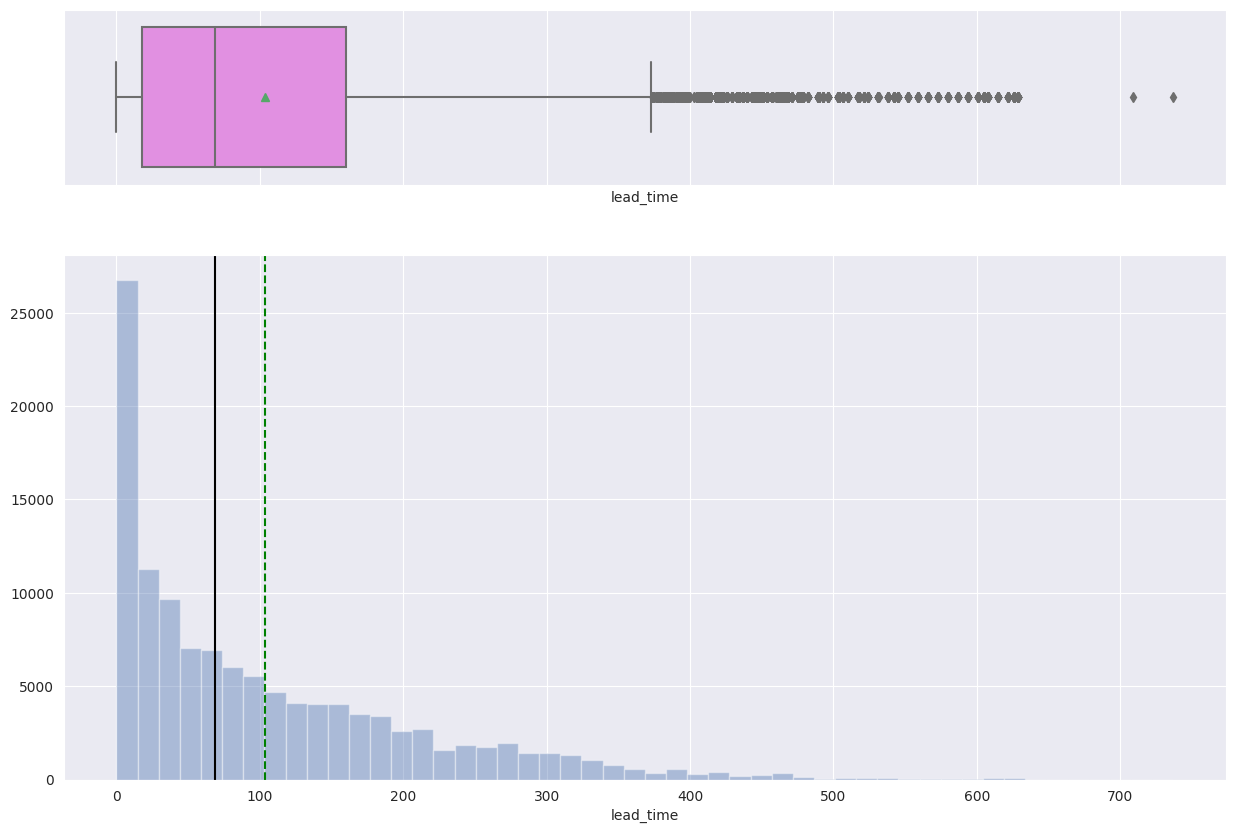

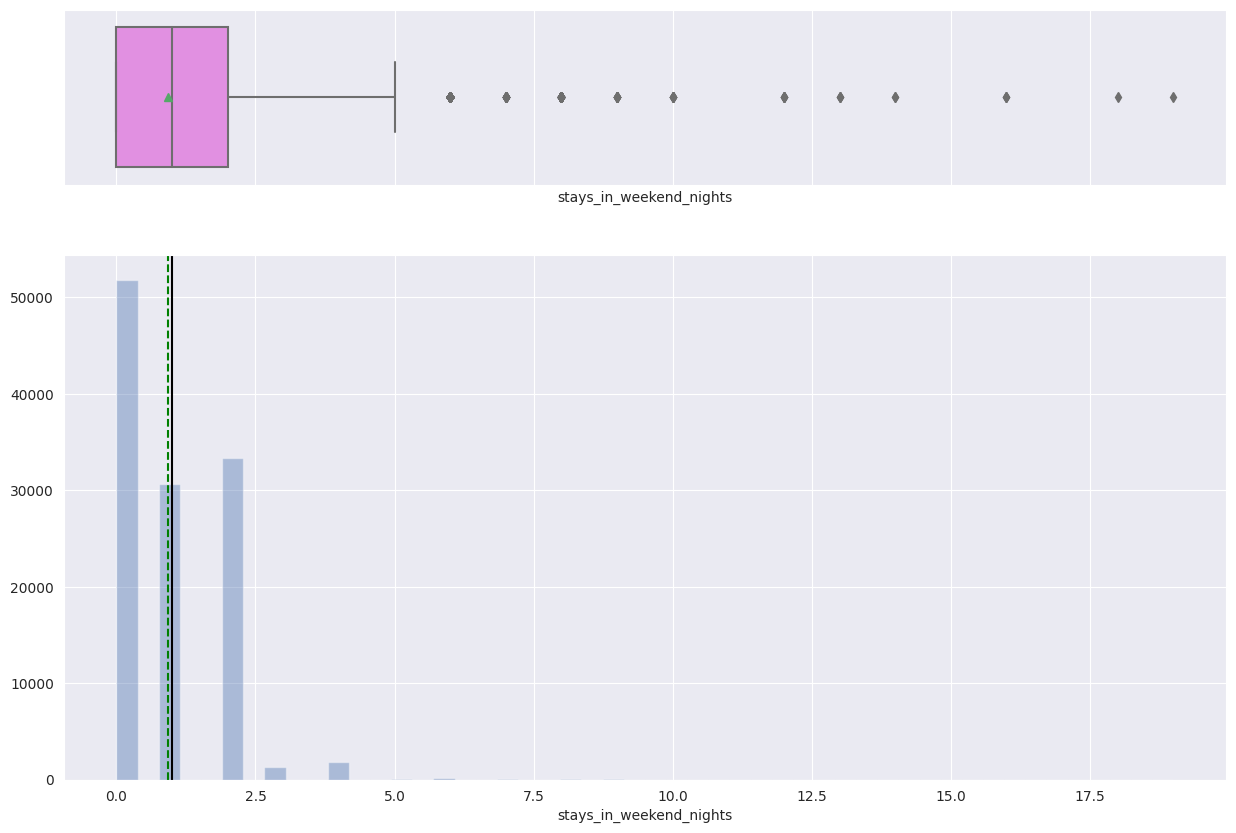

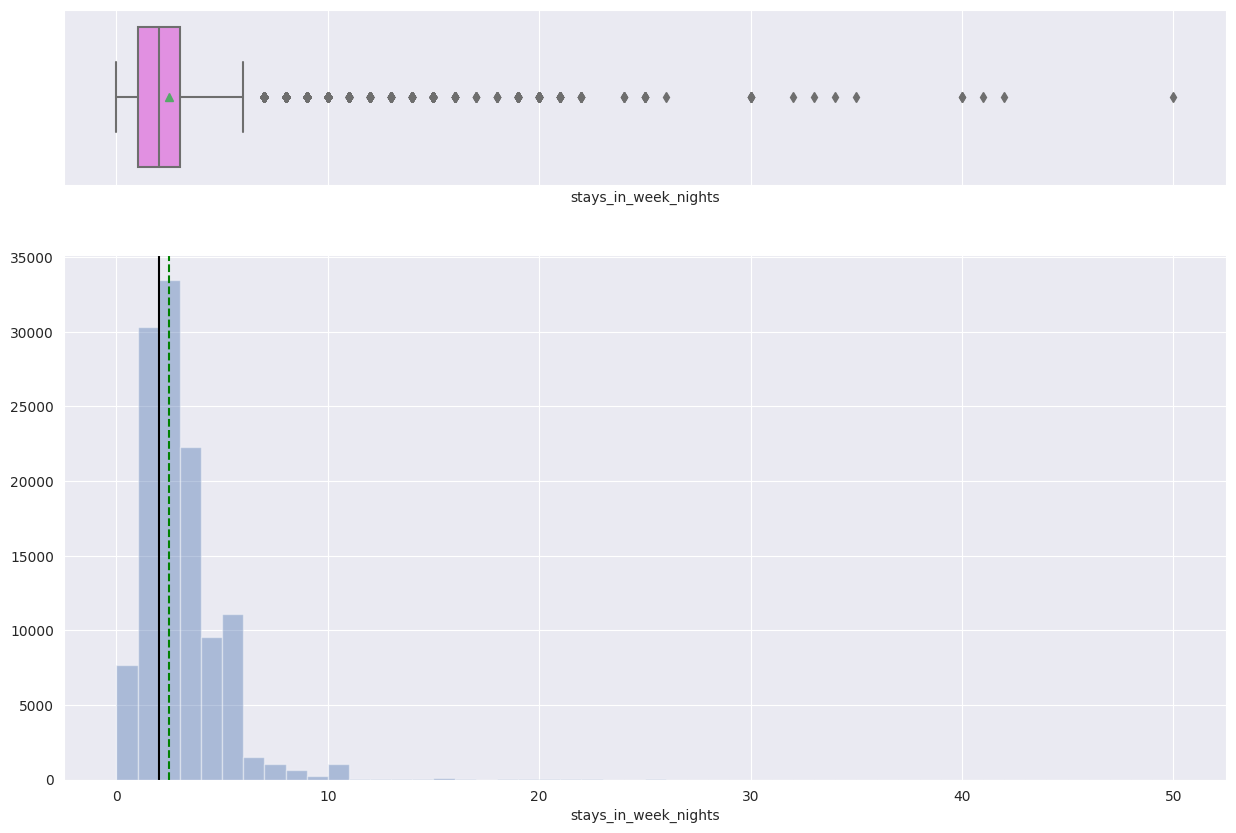

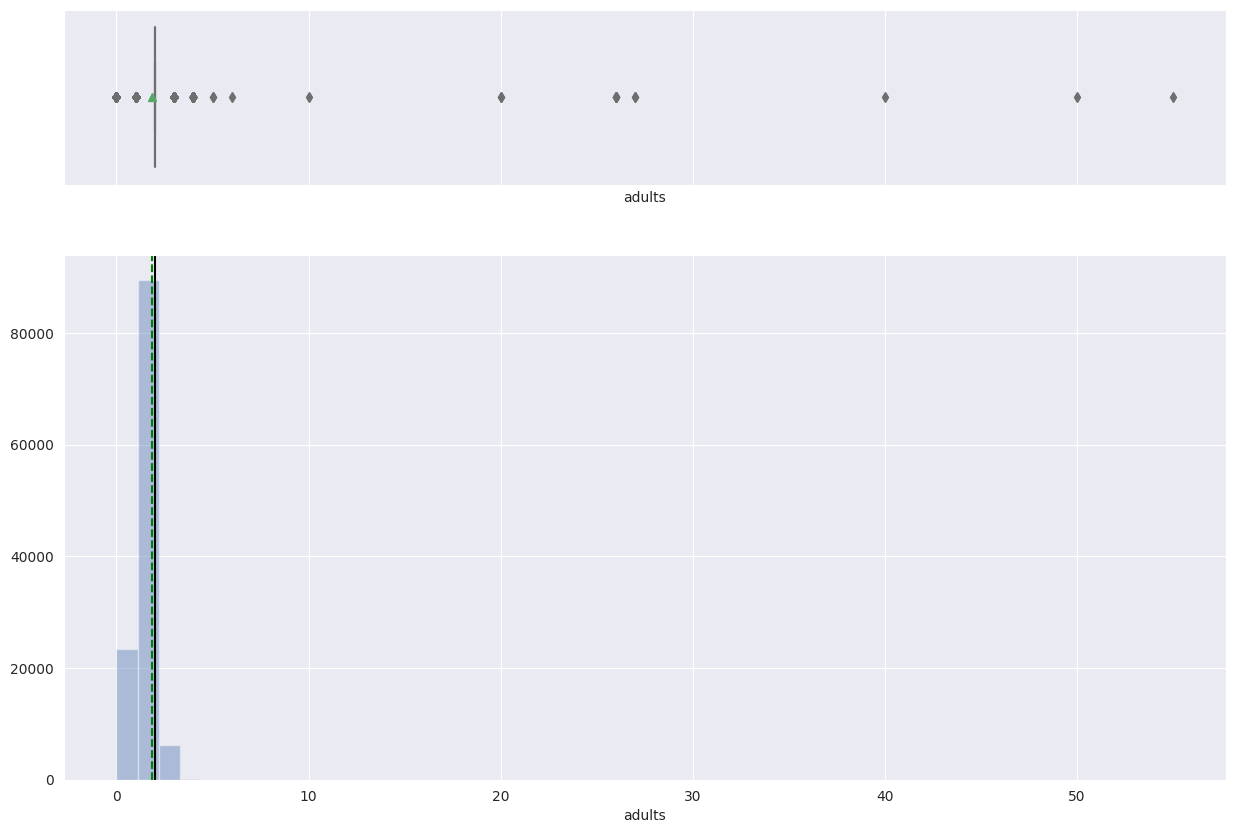

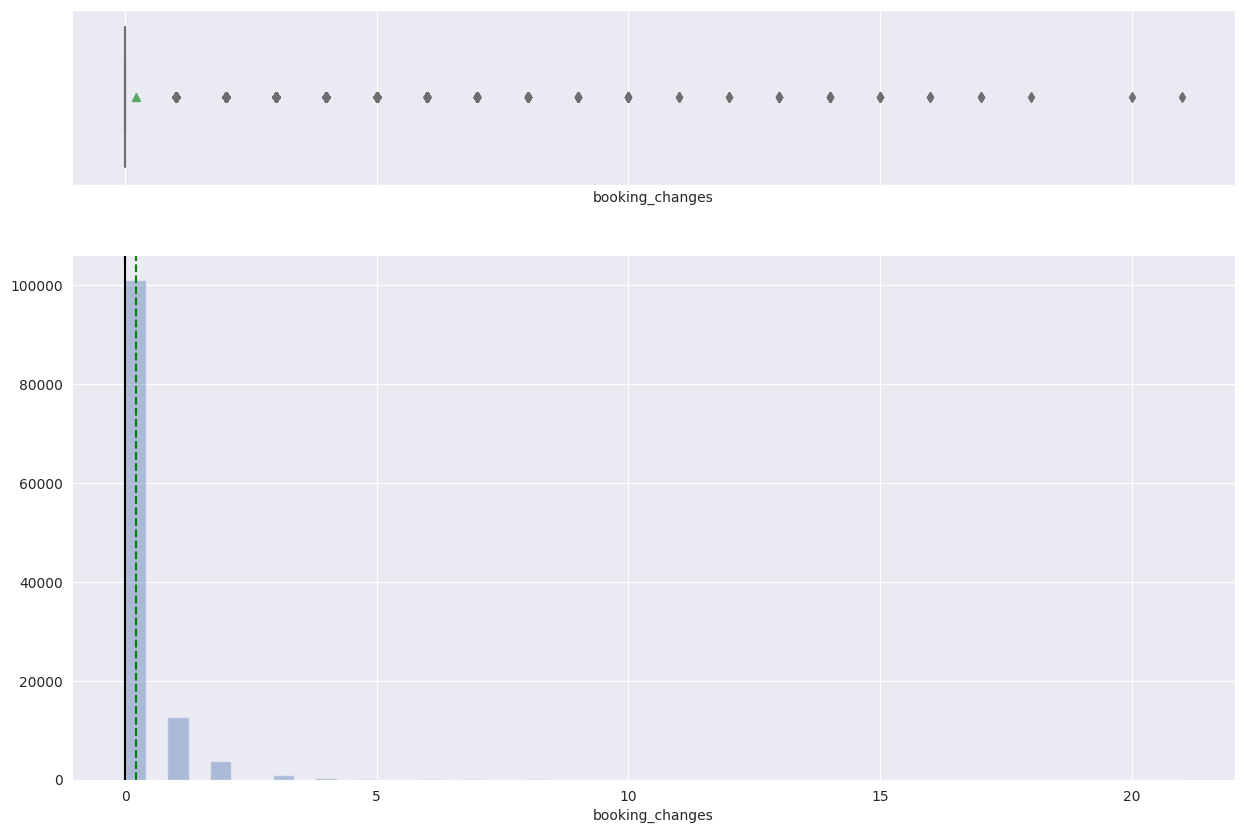

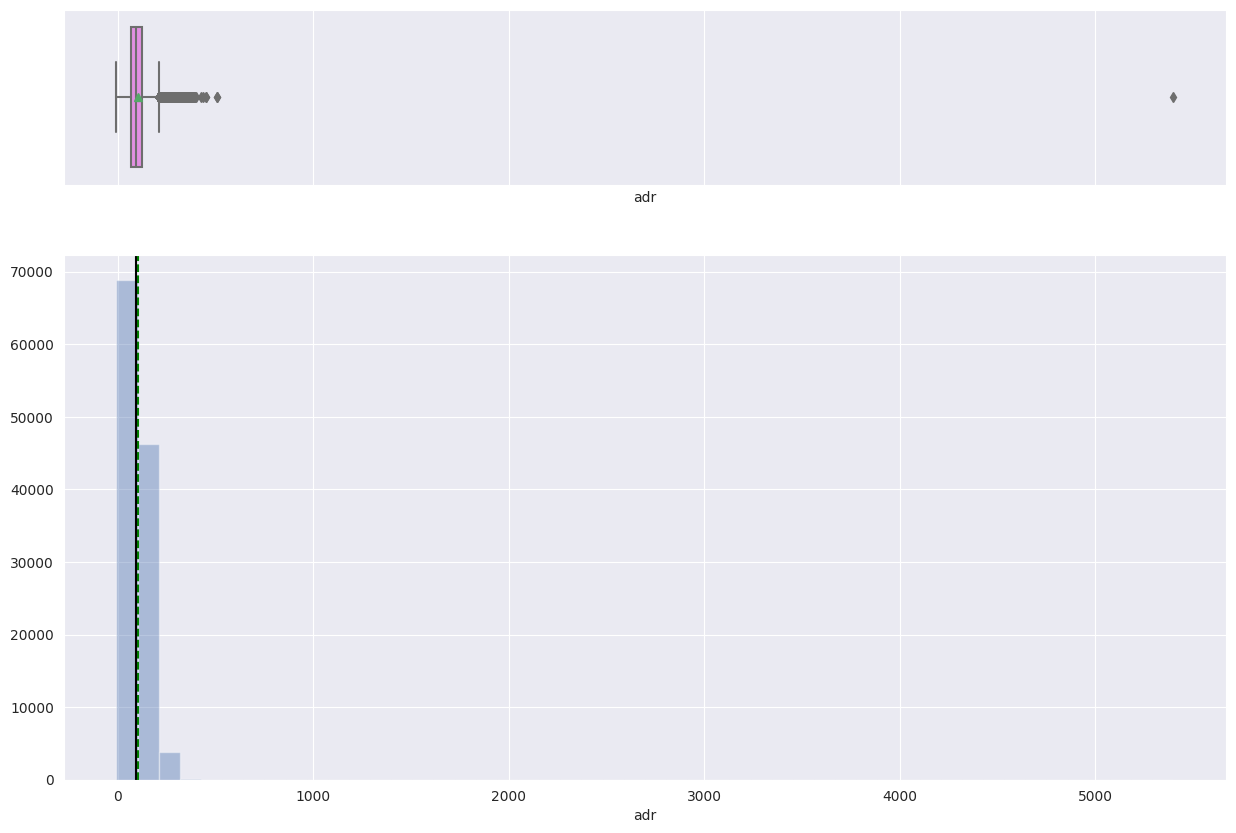

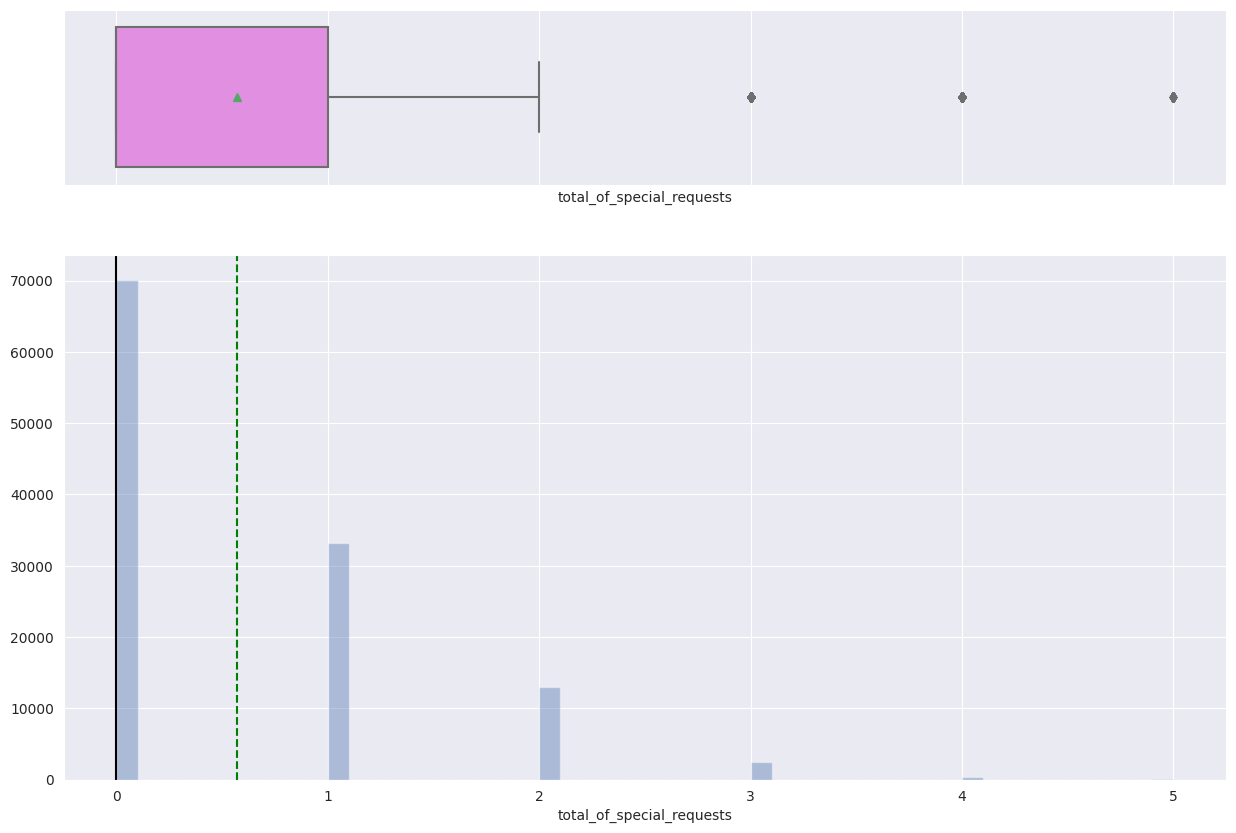

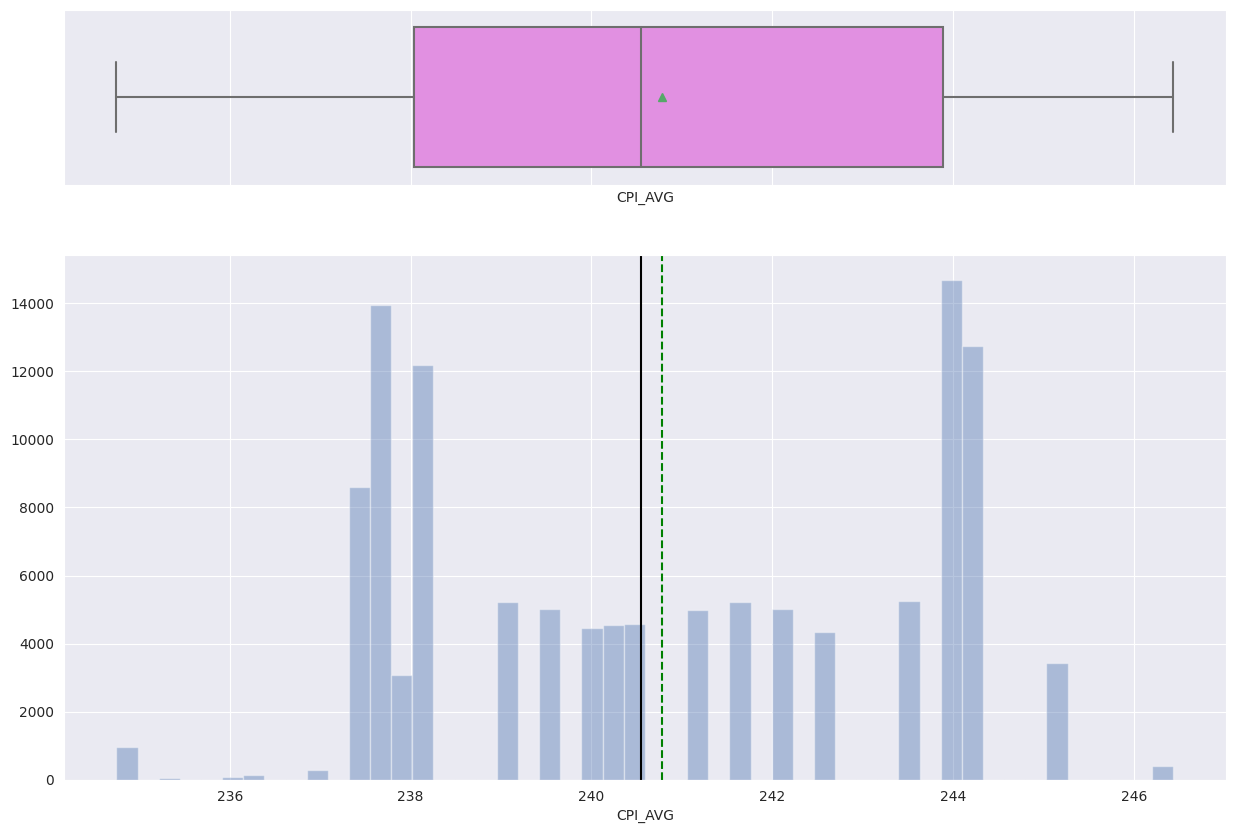

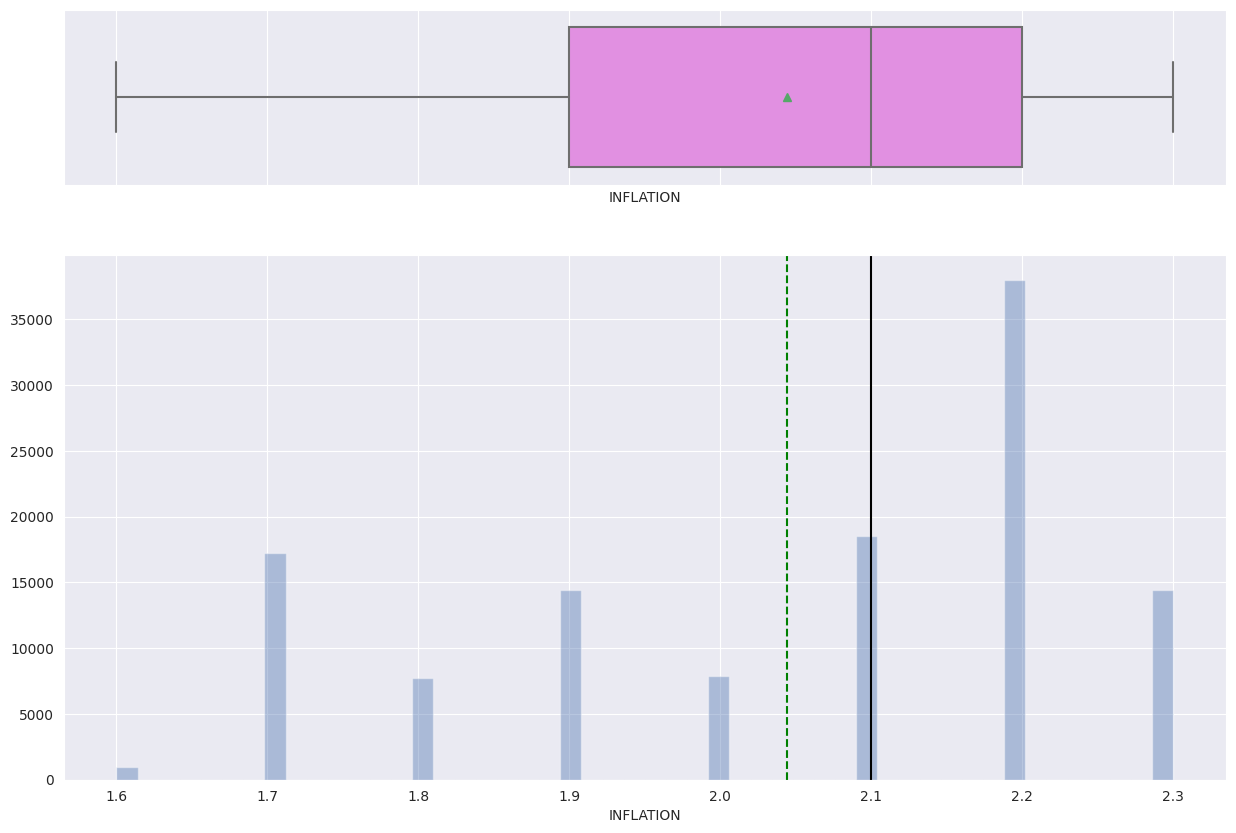

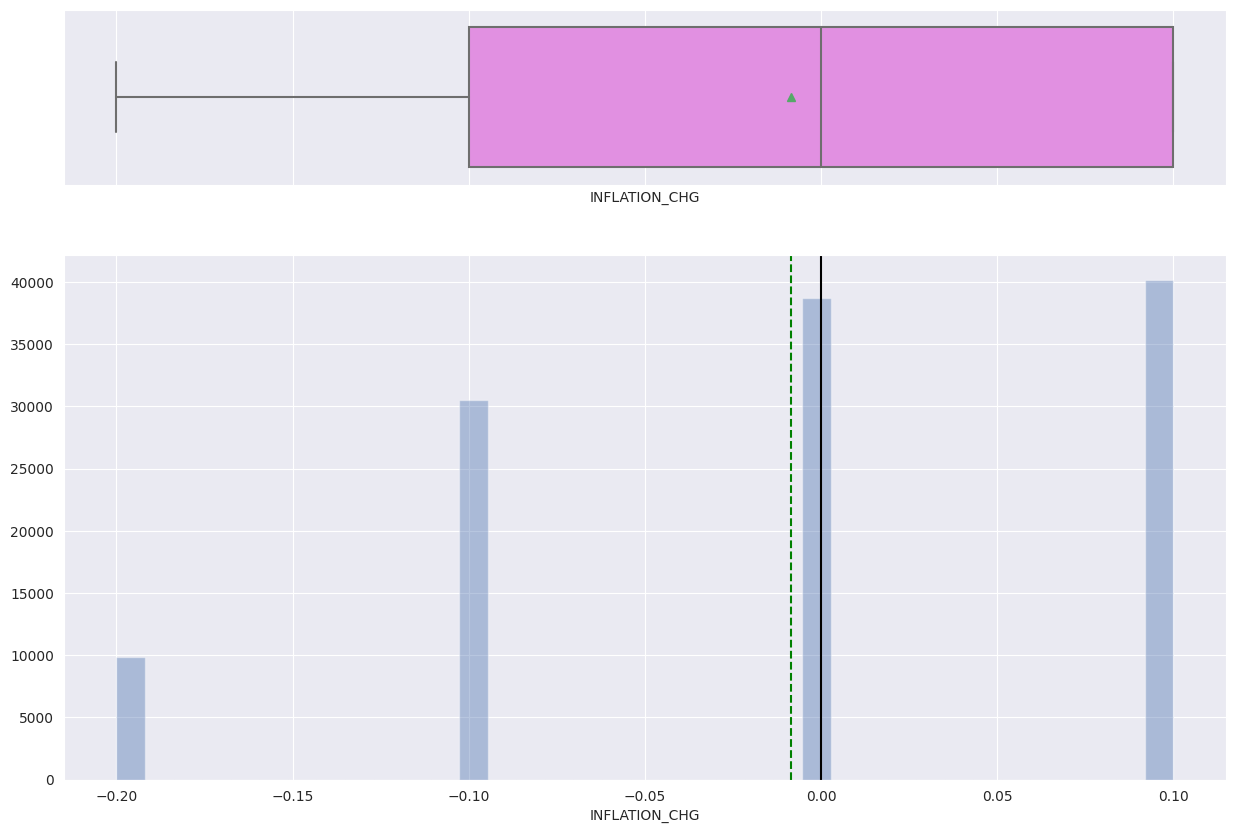

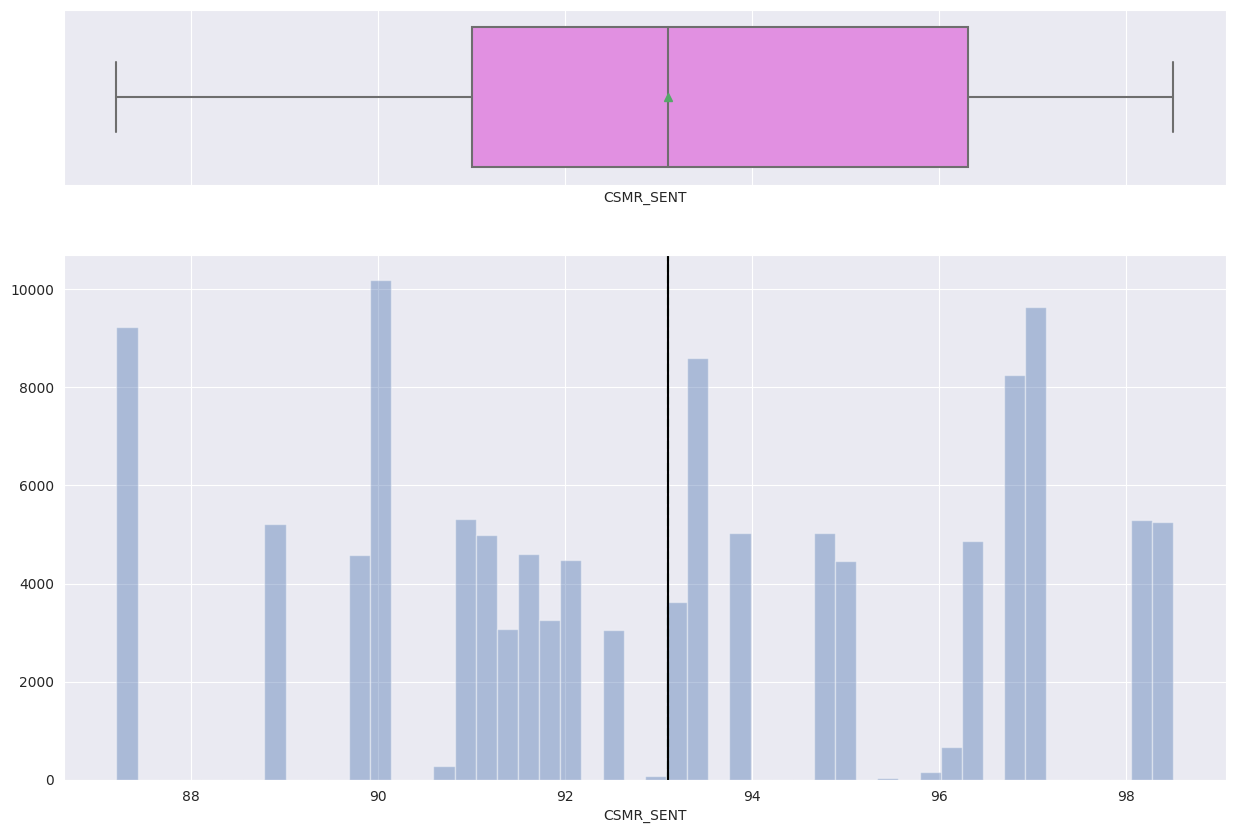

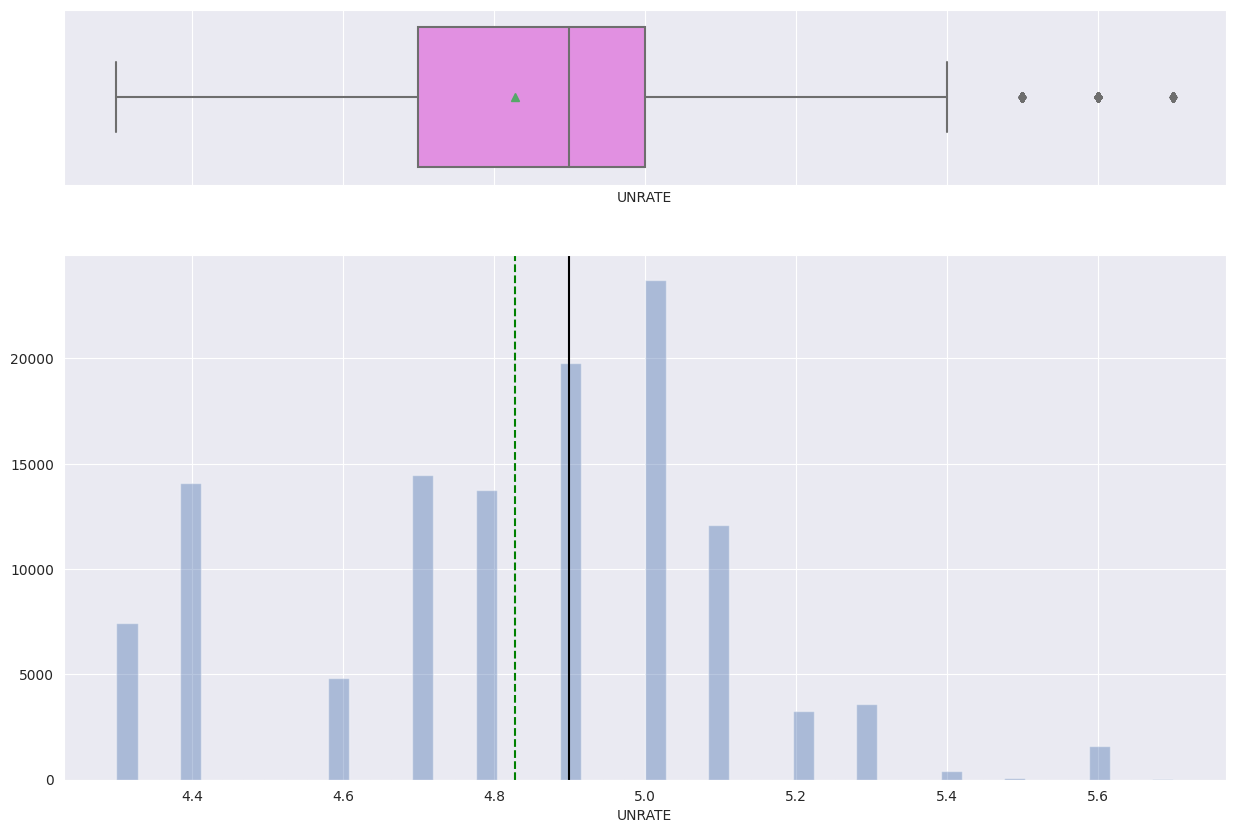

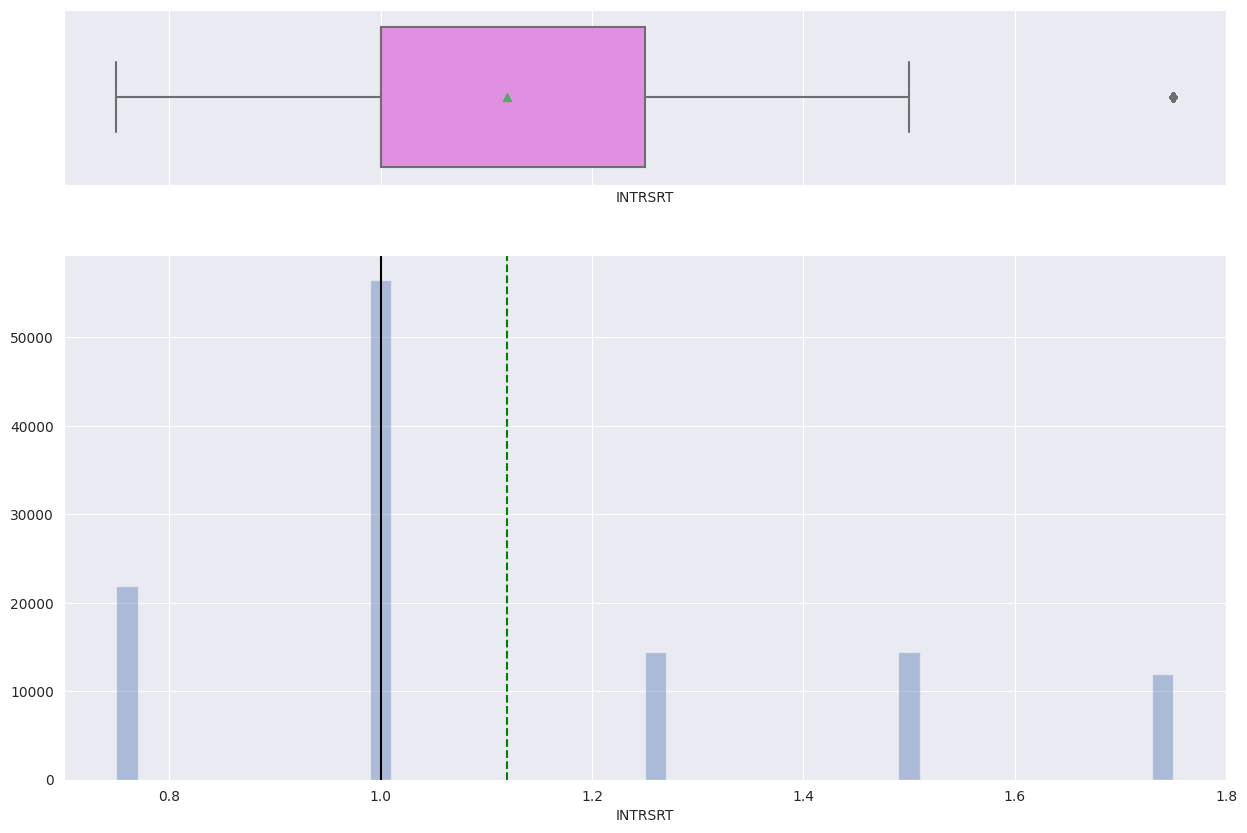

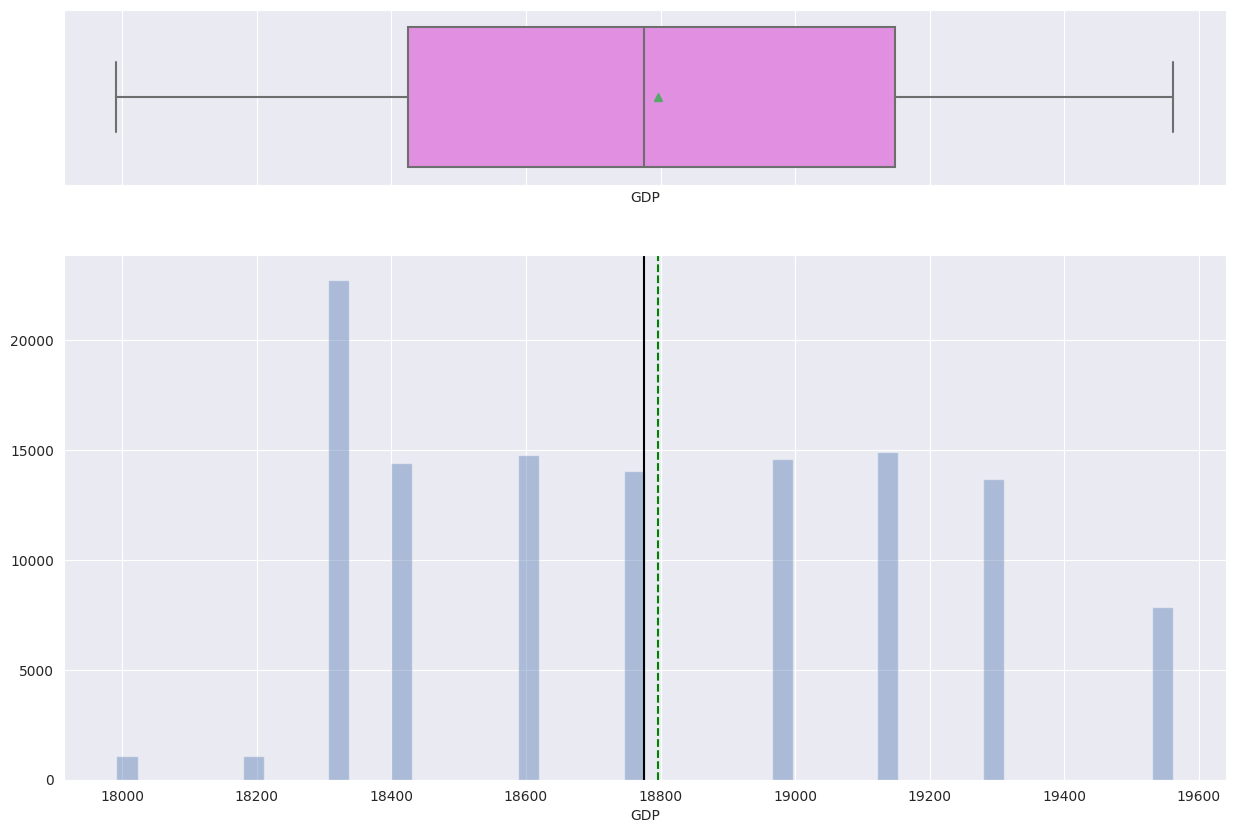

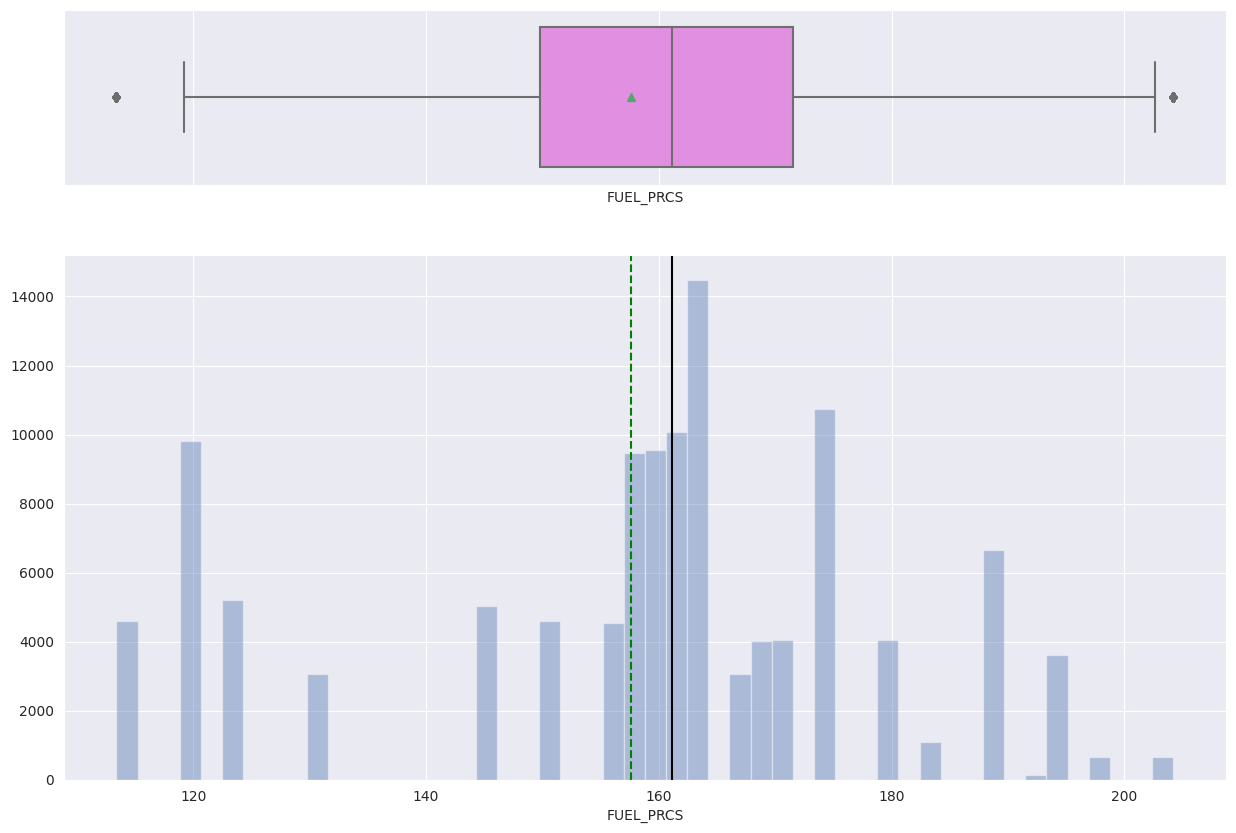

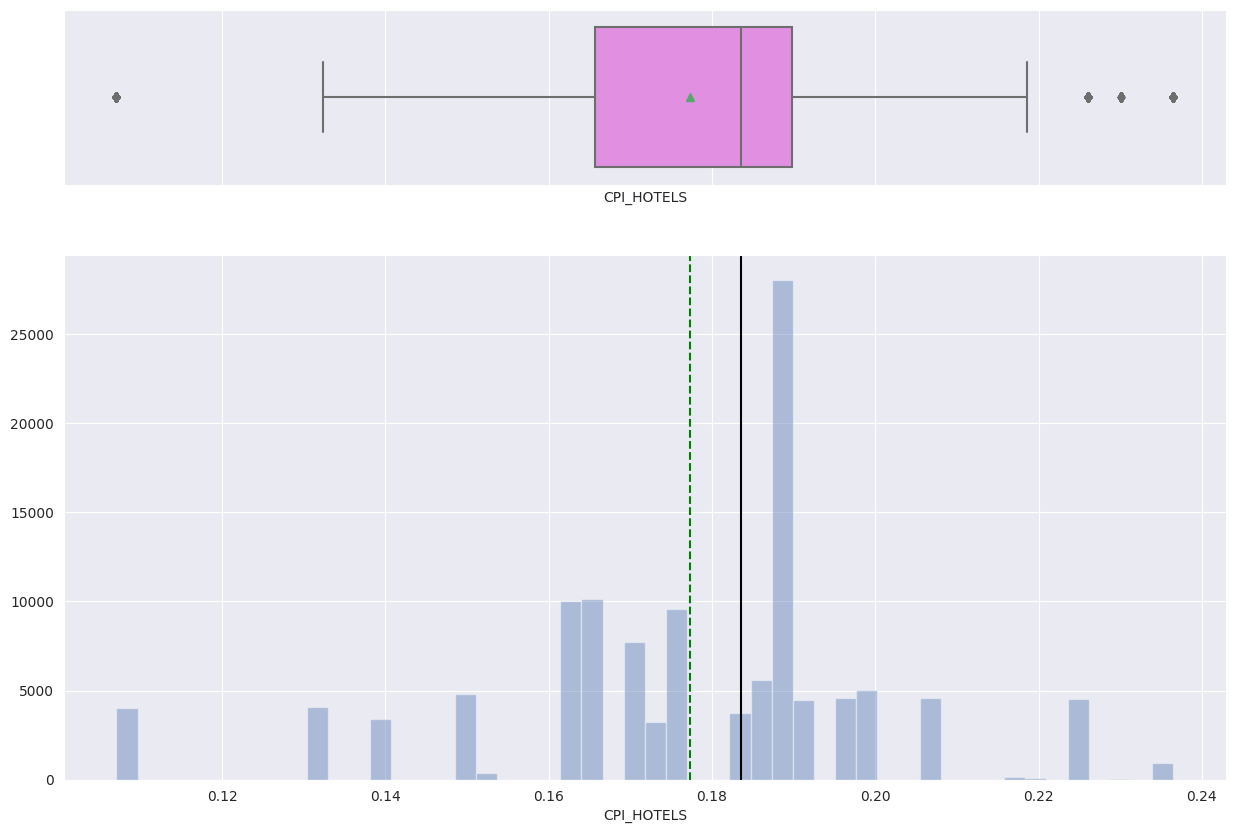

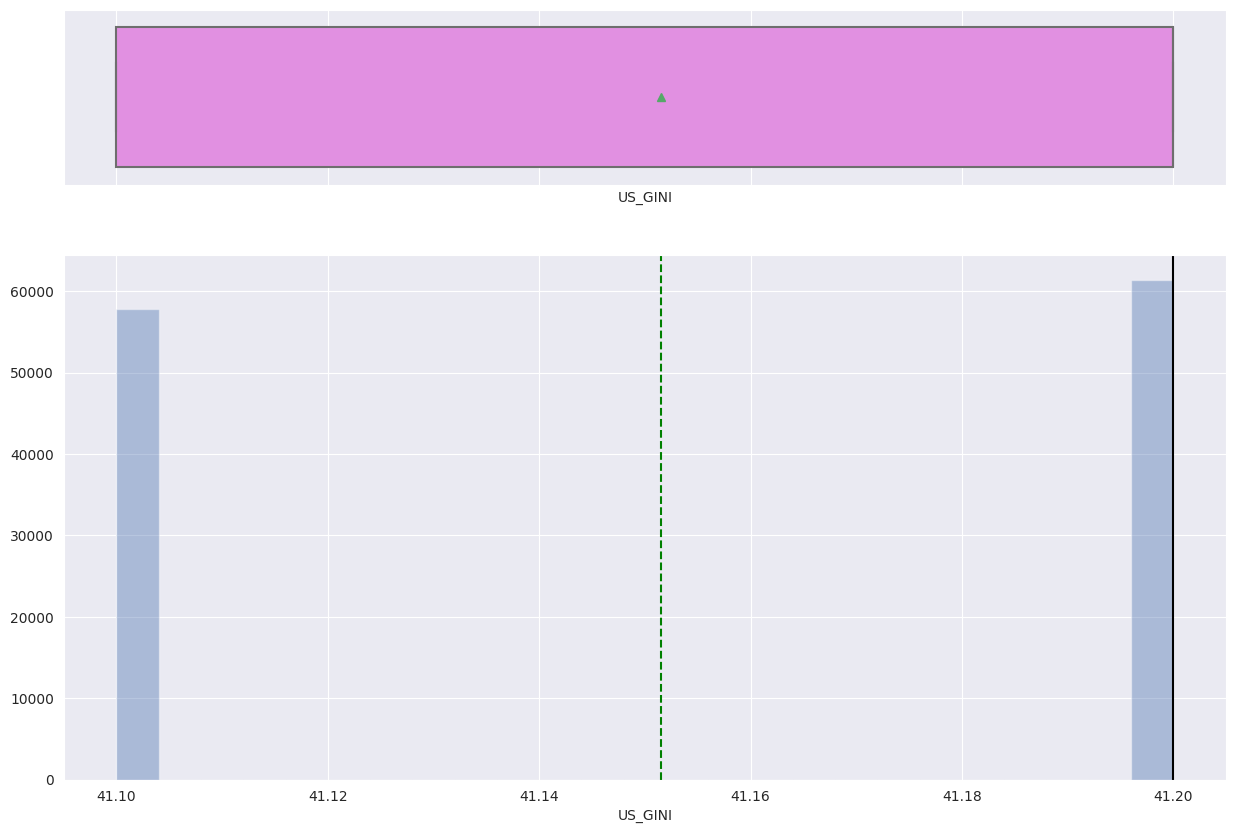

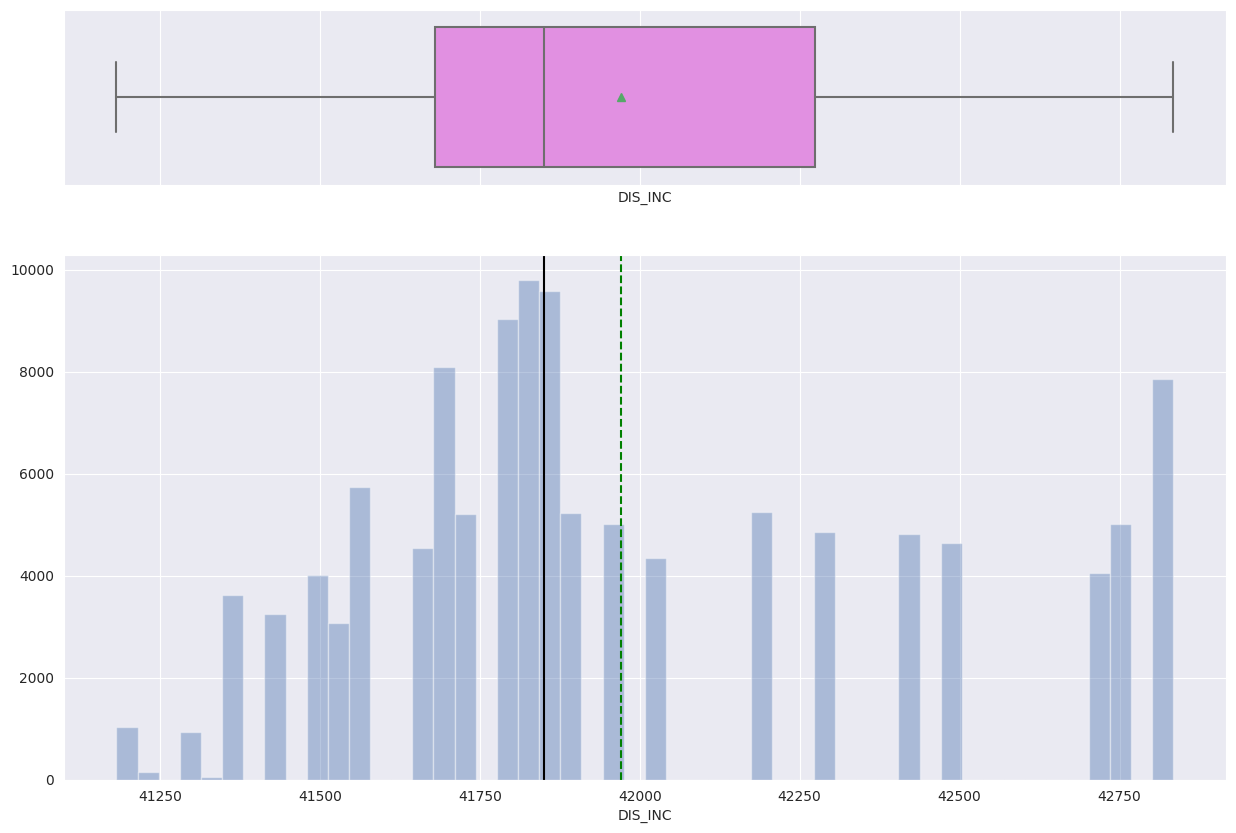

In [76]:
# distplot for continous columns
for i in ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','booking_changes','adr','total_of_special_requests','CPI_AVG','INFLATION','INFLATION_CHG','CSMR_SENT','UNRATE','INTRSRT','GDP','FUEL_PRCS','CPI_HOTELS','US_GINI','DIS_INC']:
    histogram_boxplot(hotelBook[i])
    plt.show()

In [77]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

In [78]:
hotelBook['hotel'].value_counts()

True     79150
False    40059
Name: hotel, dtype: int64

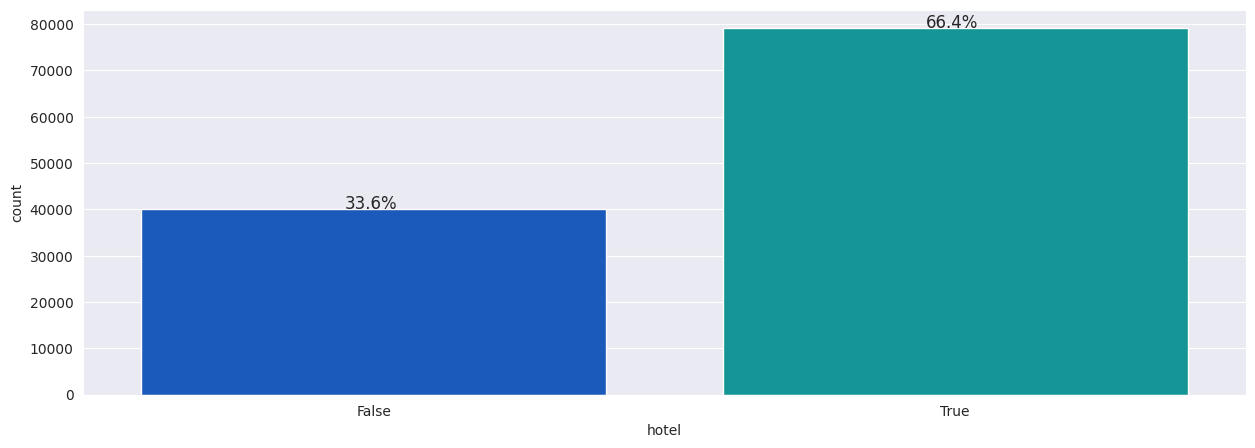

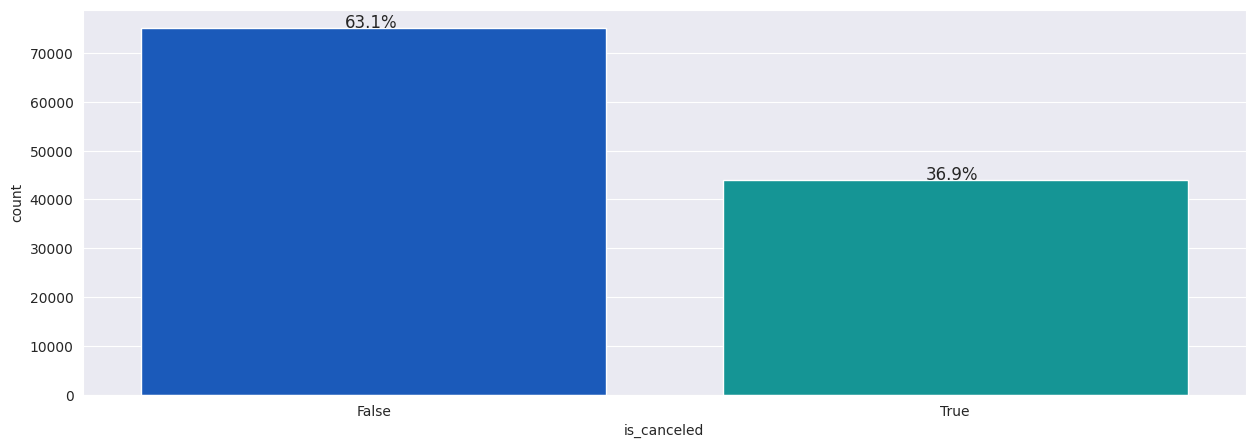

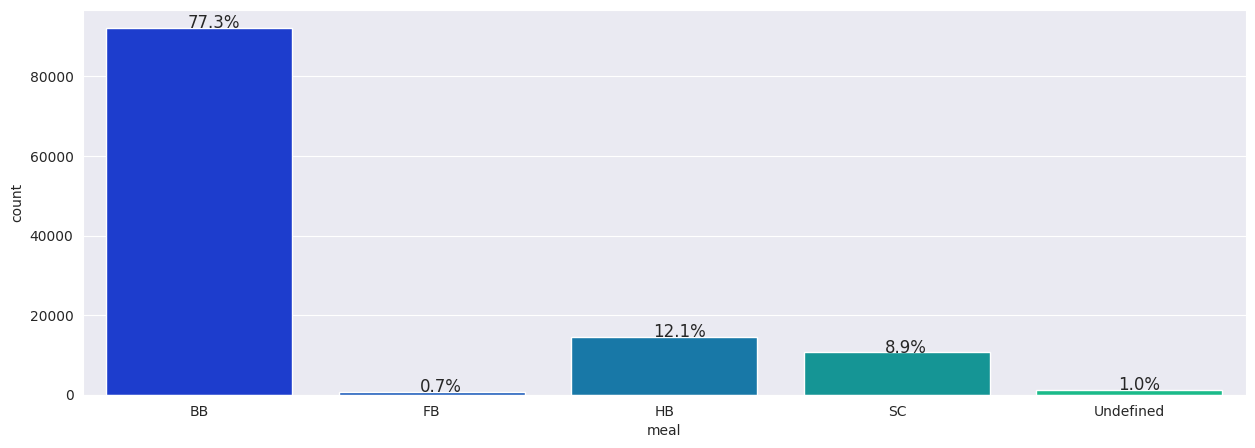

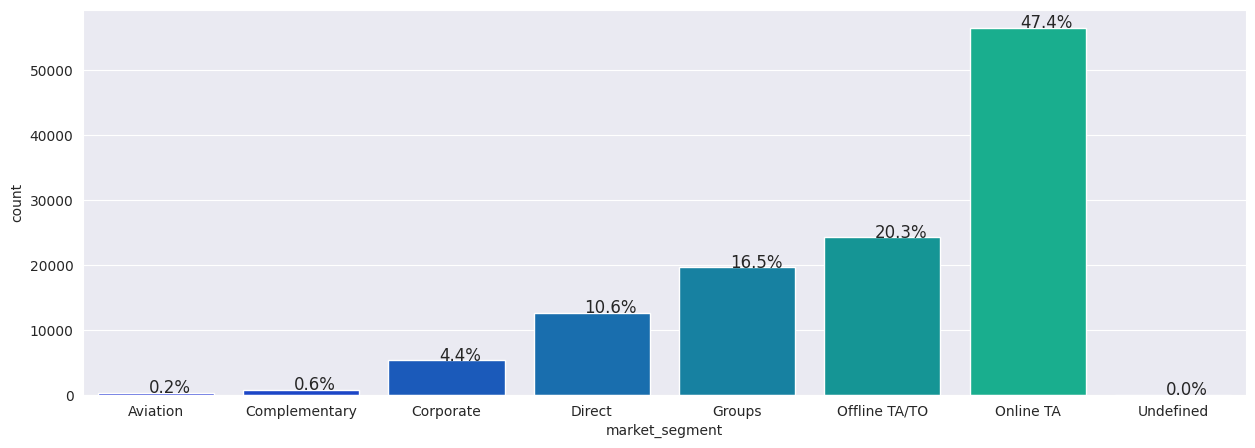

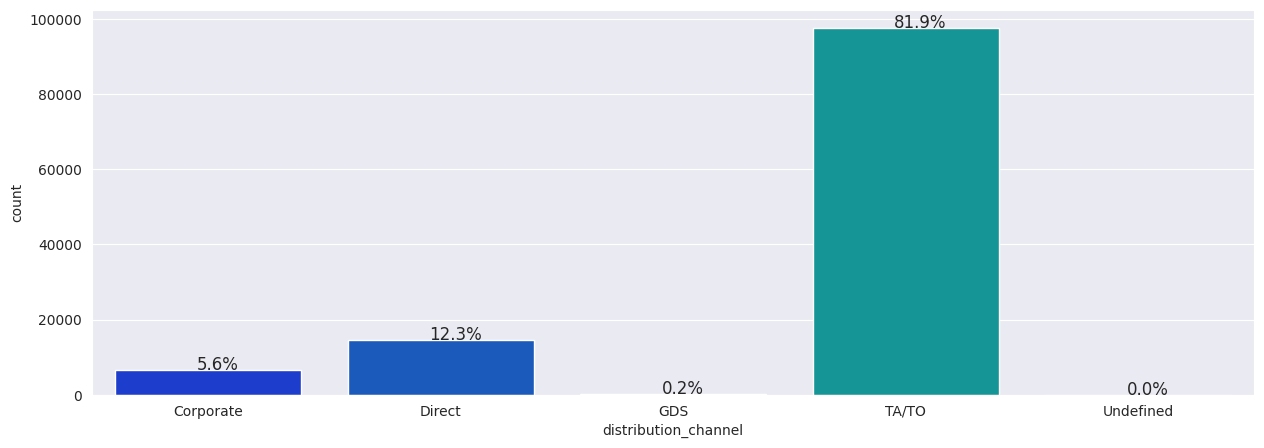

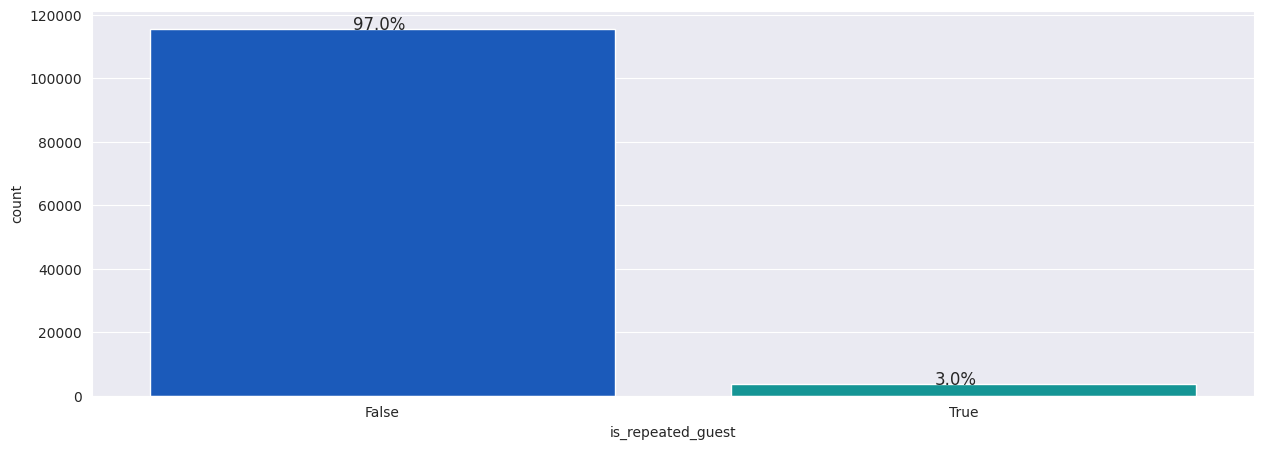

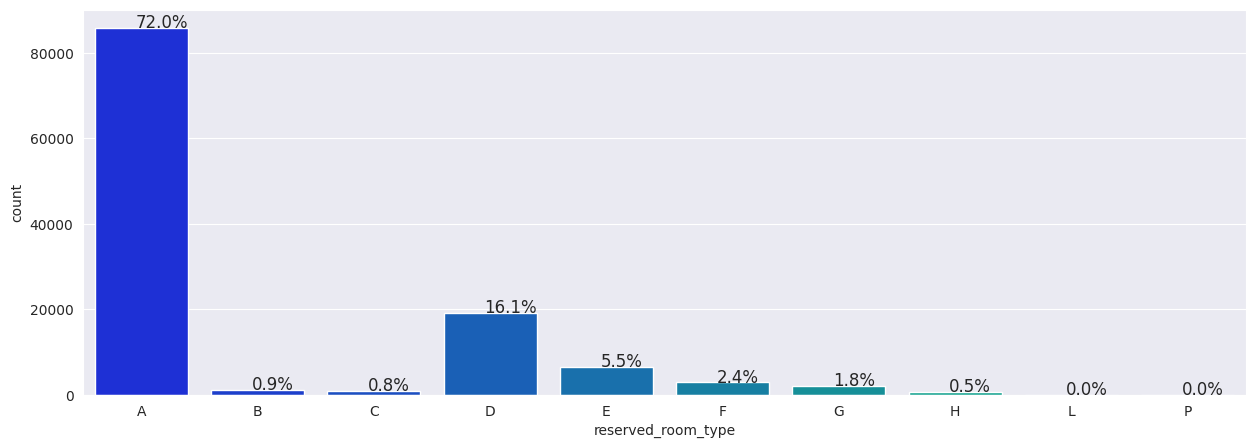

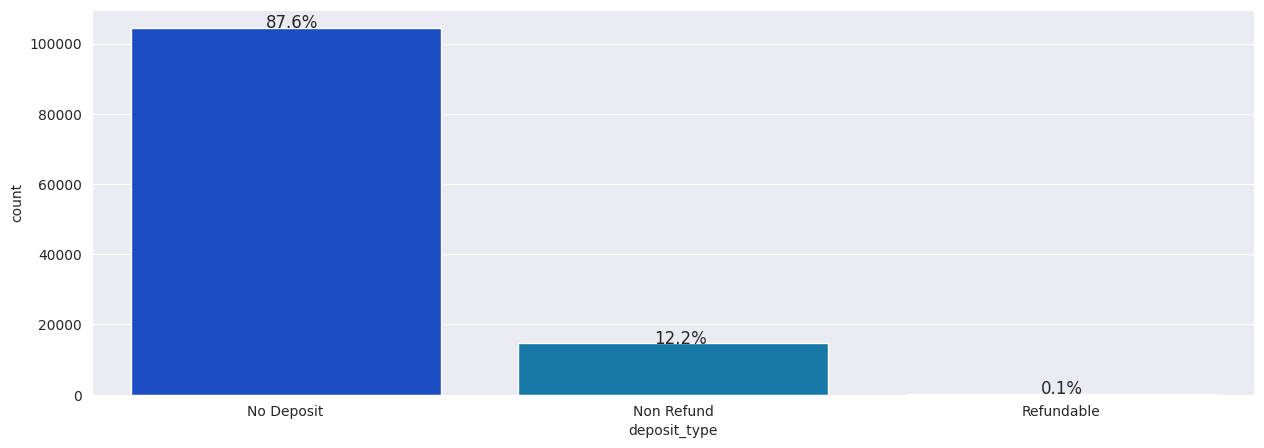

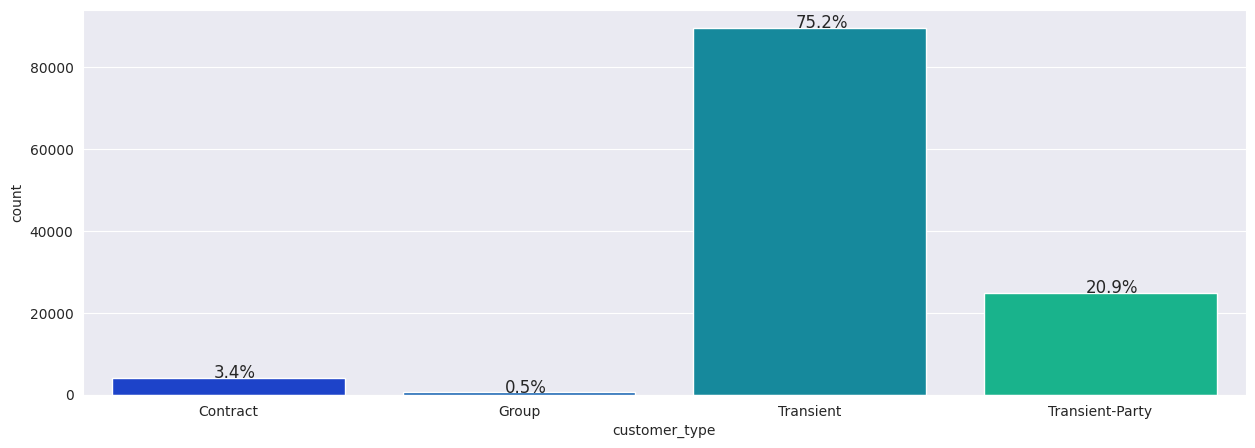

In [79]:
# bar plots for categorical values
for i in ['hotel','is_canceled','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','deposit_type','customer_type']:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x = hotelBook[i],palette='winter')
    perc_on_bar(ax,hotelBook[i])
    plt.show()

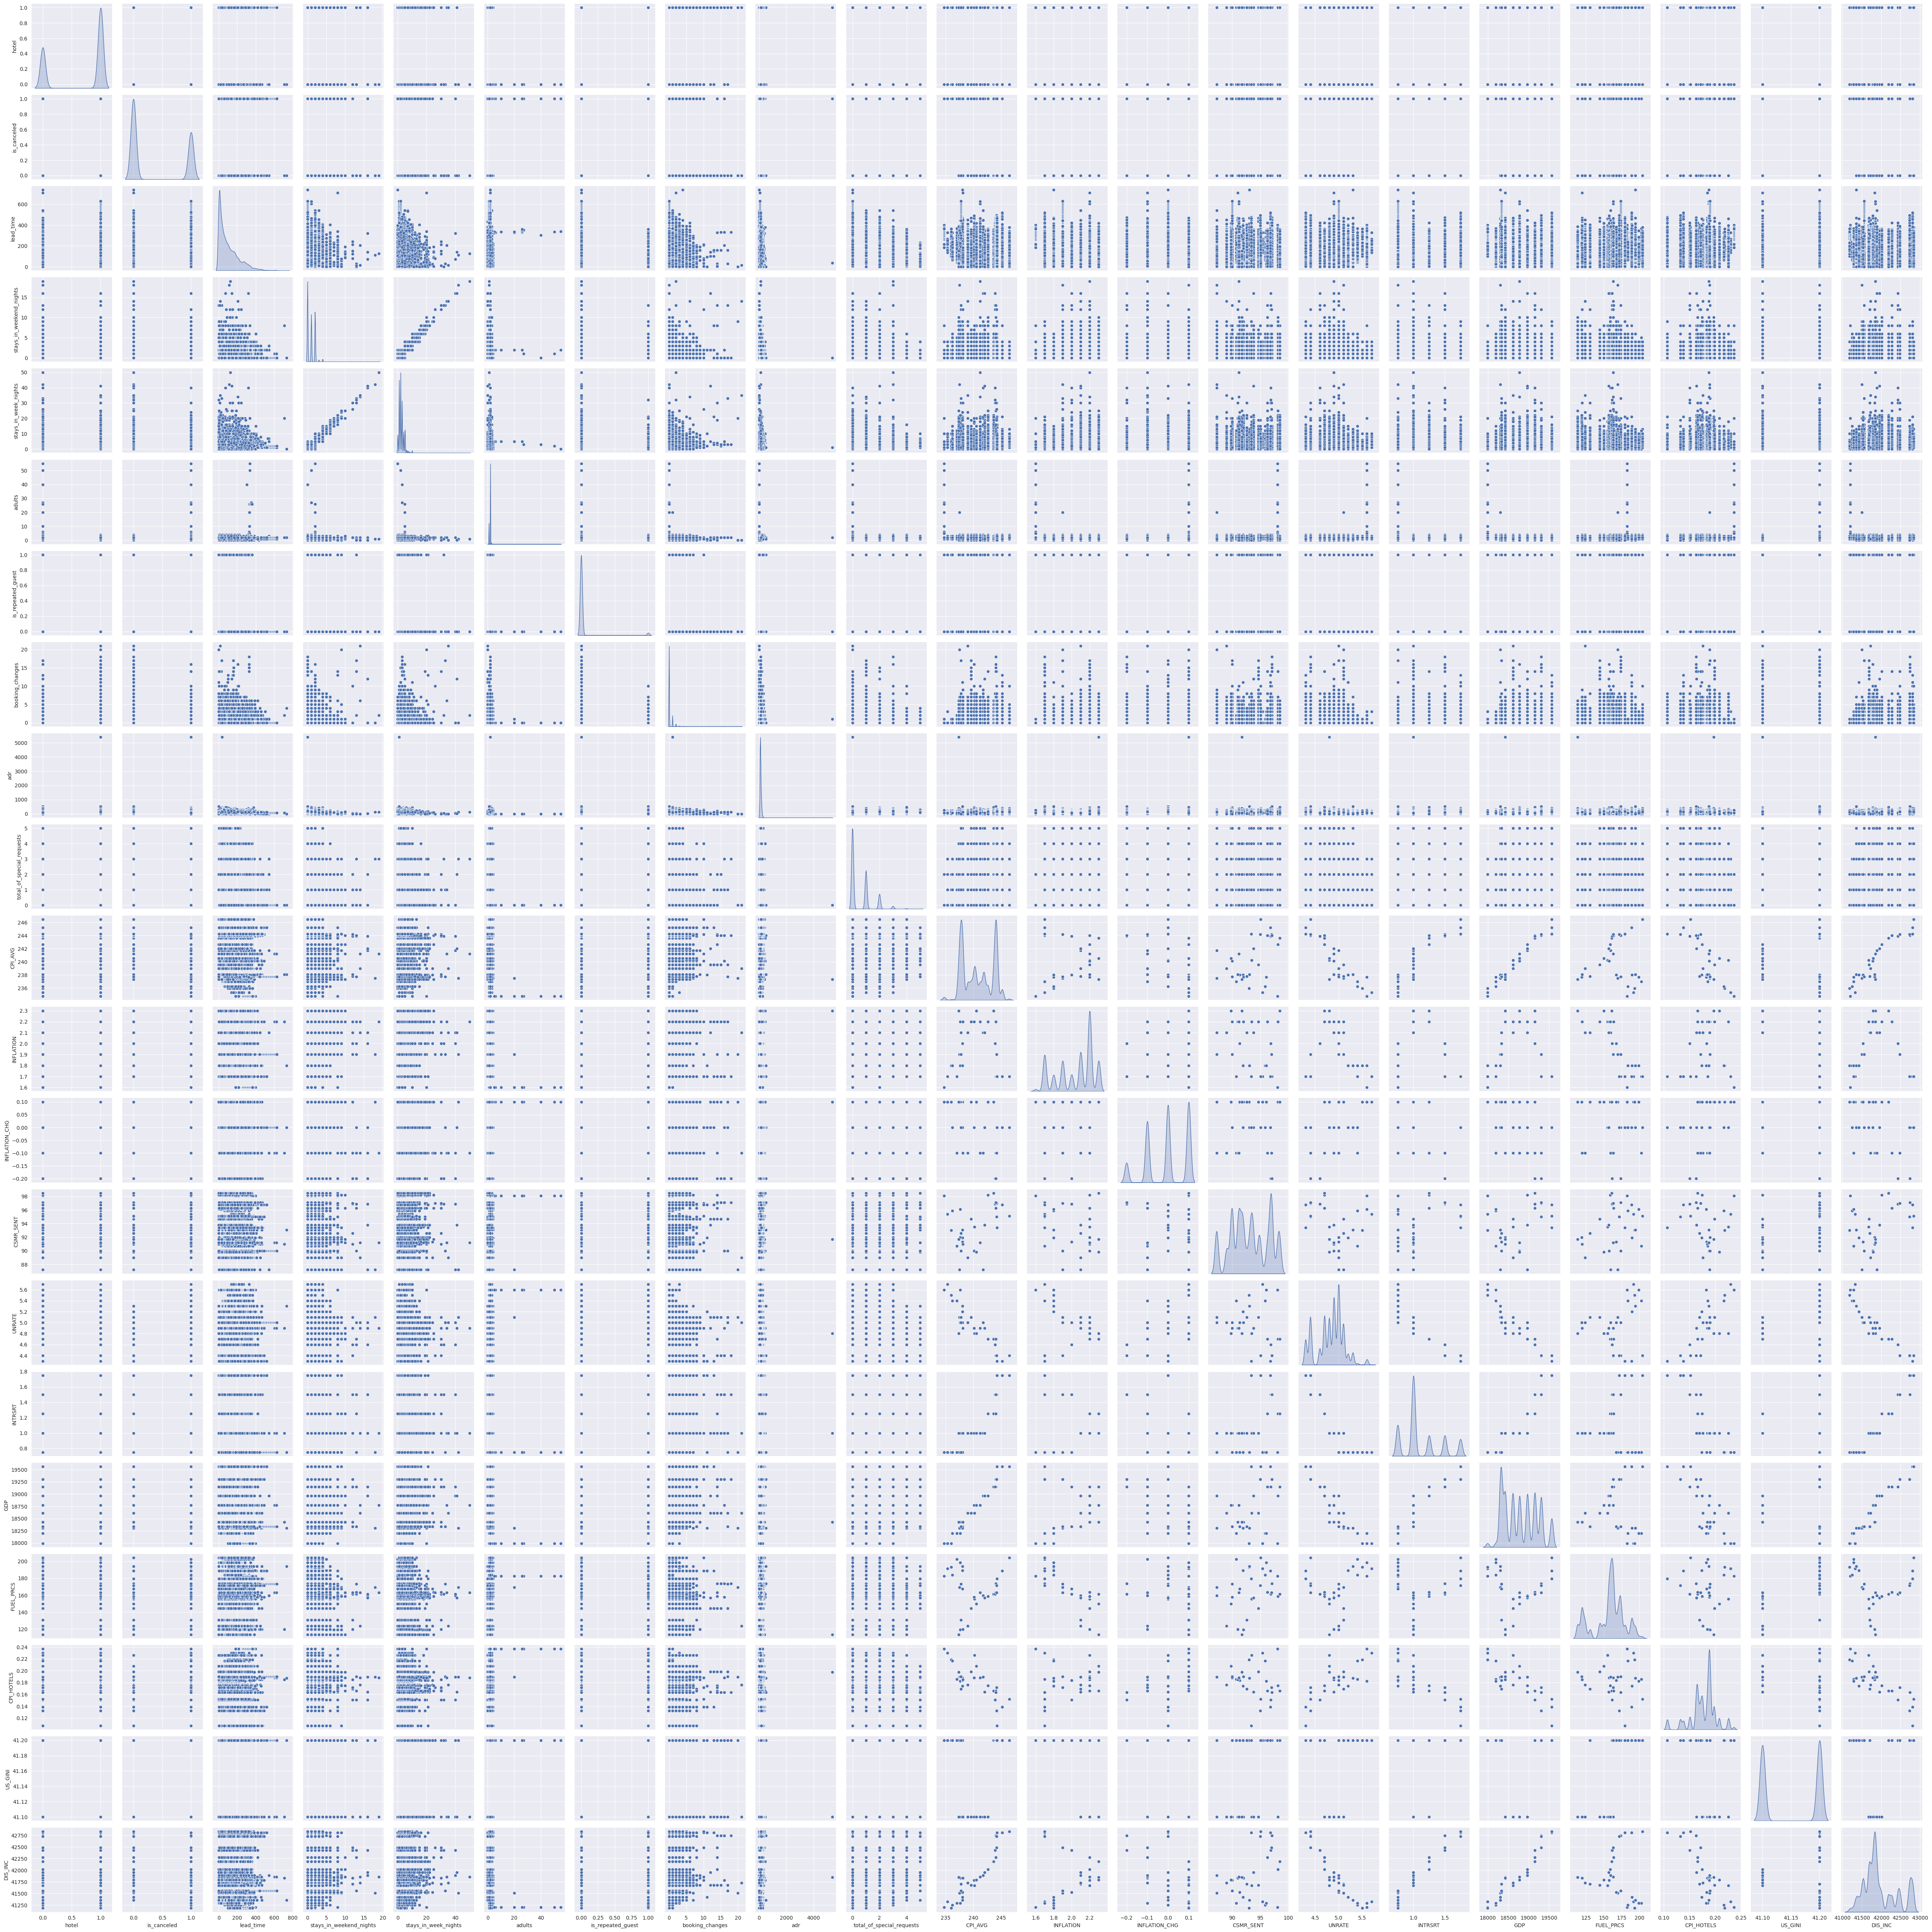

In [80]:
sns.pairplot(hotelBook, diag_kind='kde')
plt.show()

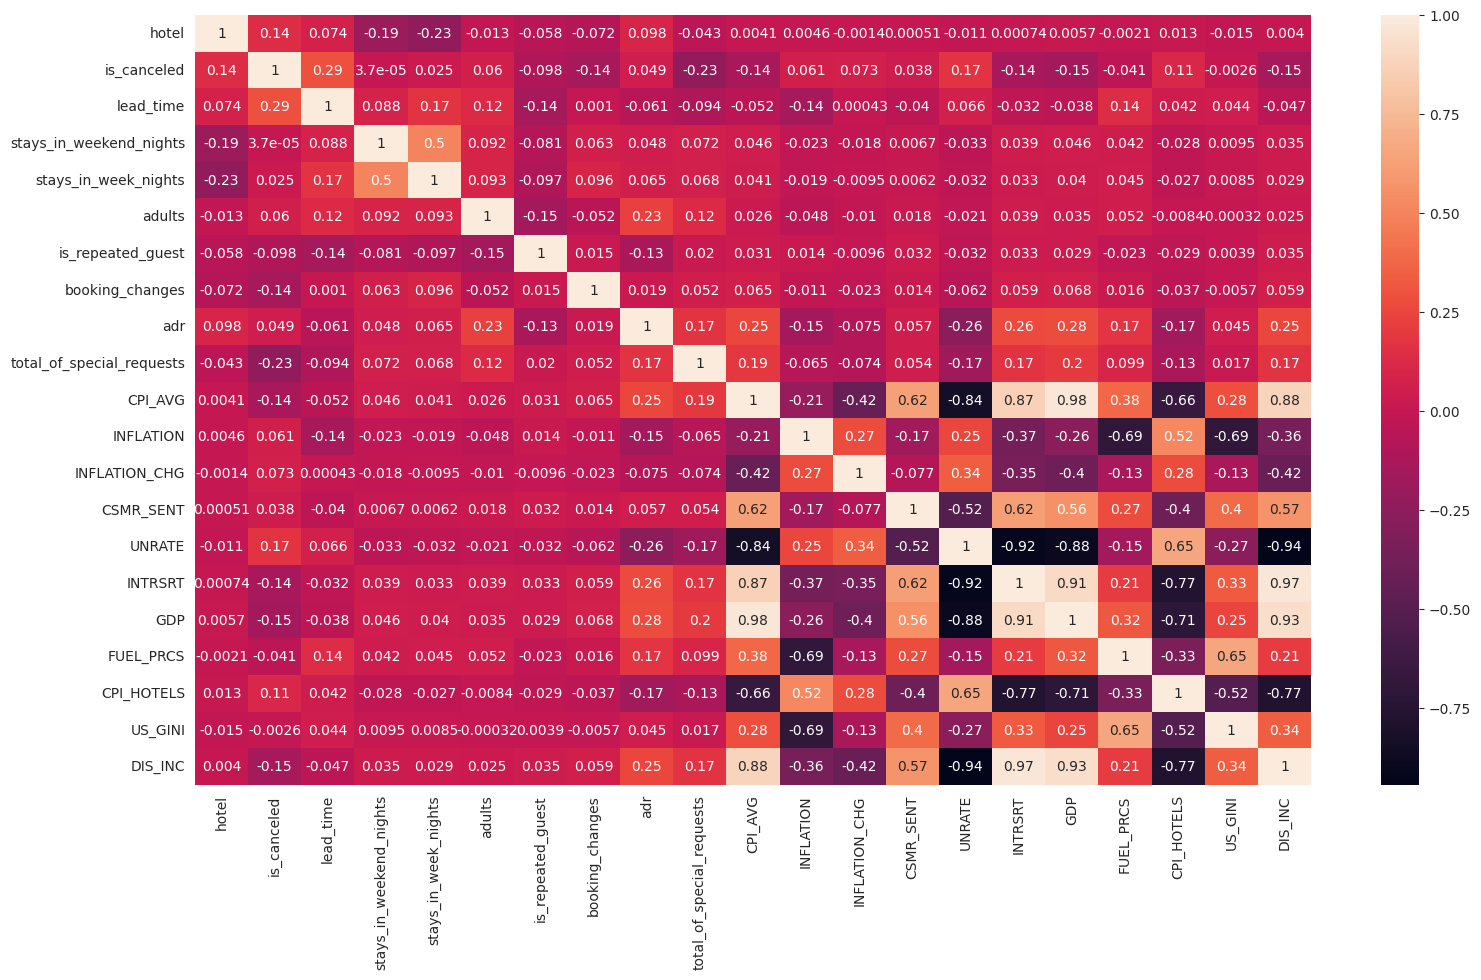

In [81]:
plt.figure(figsize=(18,10))
sns.heatmap(hotelBook.corr(),annot=True)
plt.show()

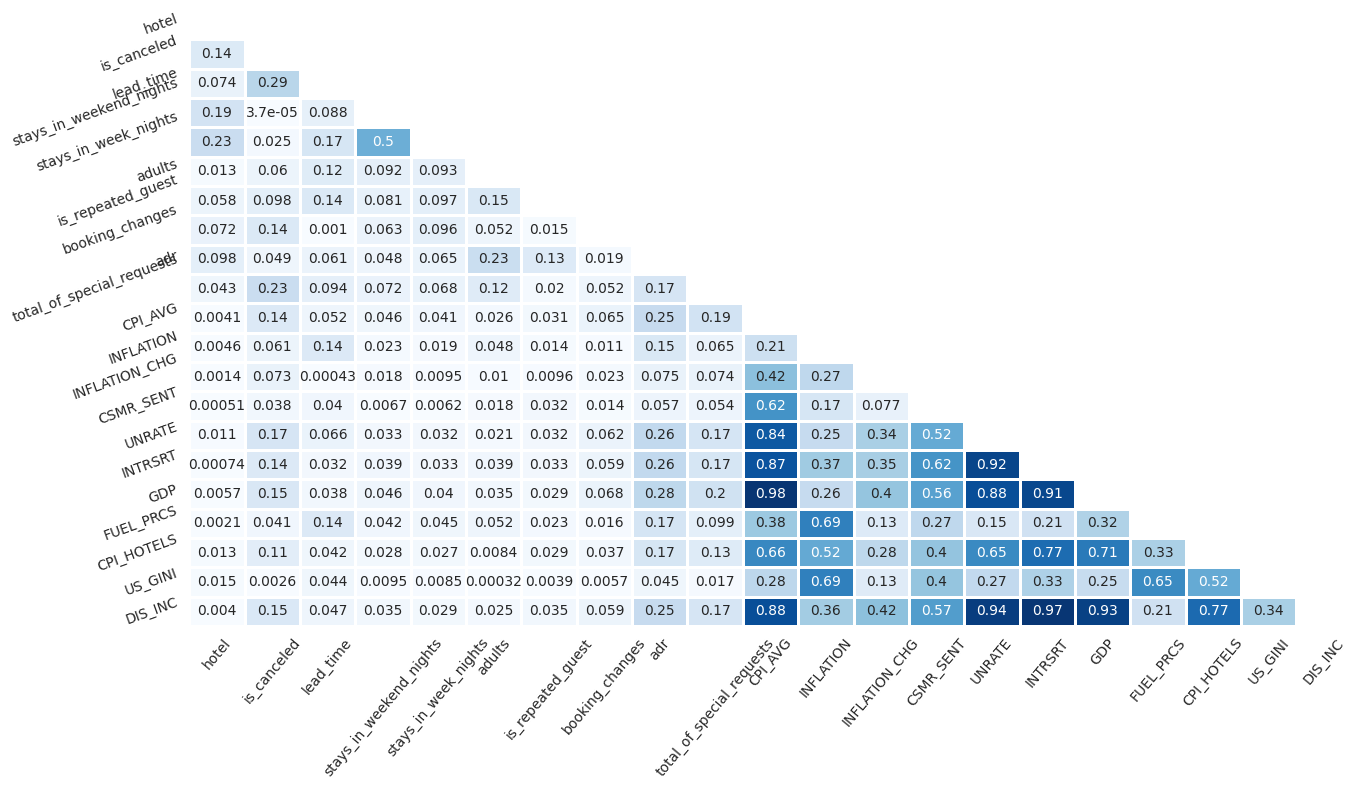

In [82]:
corr = abs(hotelBook.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [83]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, hotelBook['is_canceled'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x, hotelBook['is_canceled'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

is_canceled  False   True     All
hotel                            
False        28938  11121   40059
True         46228  32922   79150
All          75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


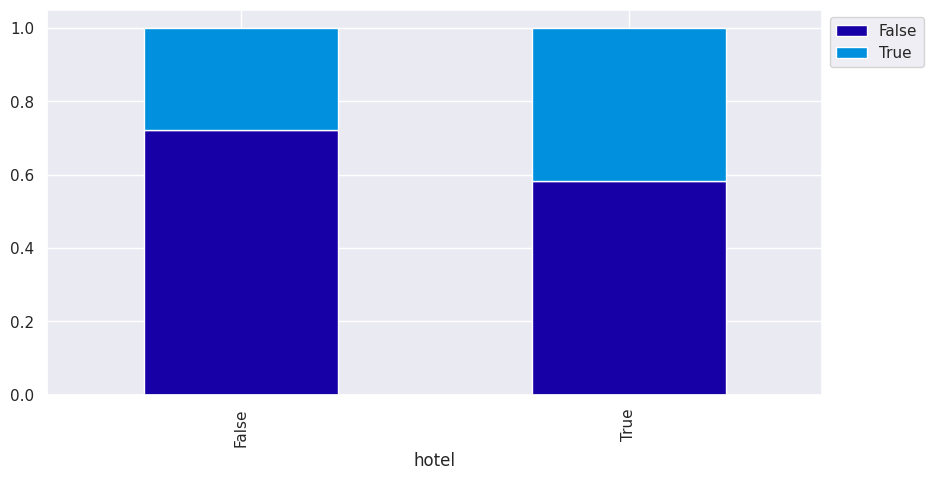

is_canceled  False   True     All
meal                             
BB           57800  34329   92129
FB             320    478     798
HB            9479   4984   14463
SC            6684   3966   10650
Undefined      883    286    1169
All          75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


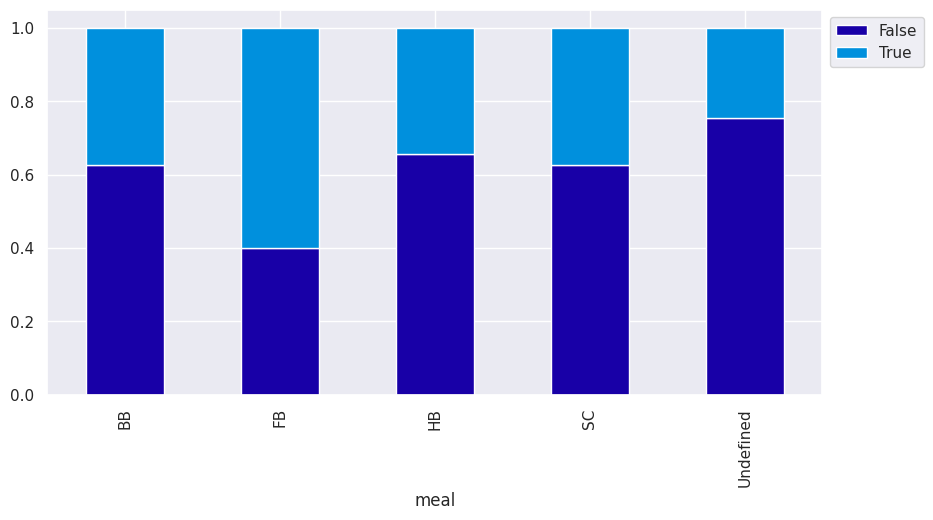

is_canceled     False   True     All
market_segment                      
Aviation          185     52     237
Complementary     646     97     743
Corporate        4303    992    5295
Direct          10672   1933   12605
Groups           7714  11917   19631
Offline TA/TO   15908   8311   24219
Online TA       35738  20739   56477
Undefined           0      2       2
All             75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


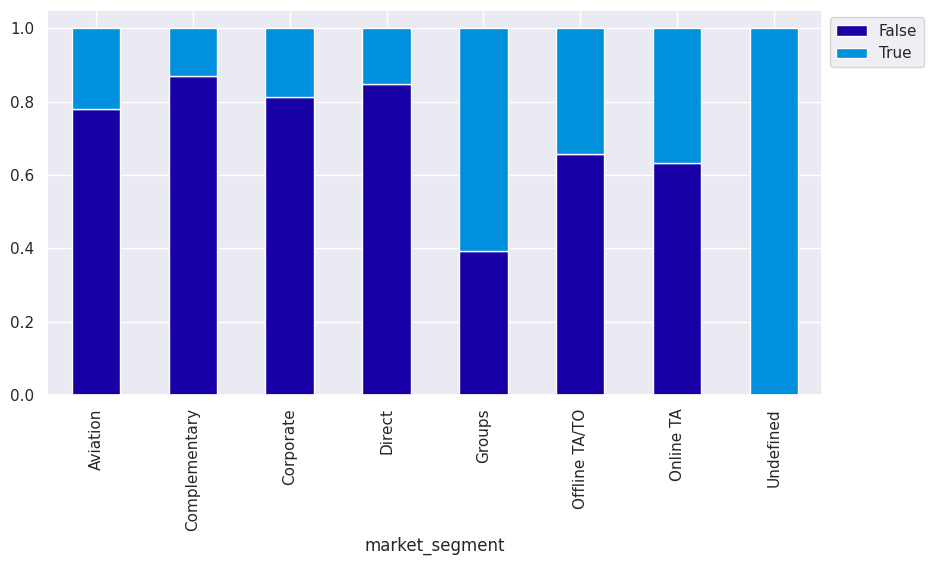

is_canceled           False   True     All
distribution_channel                      
Corporate              5203   1474    6677
Direct                12088   2557   14645
GDS                     156     37     193
TA/TO                 57718  39971   97689
Undefined                 1      4       5
All                   75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


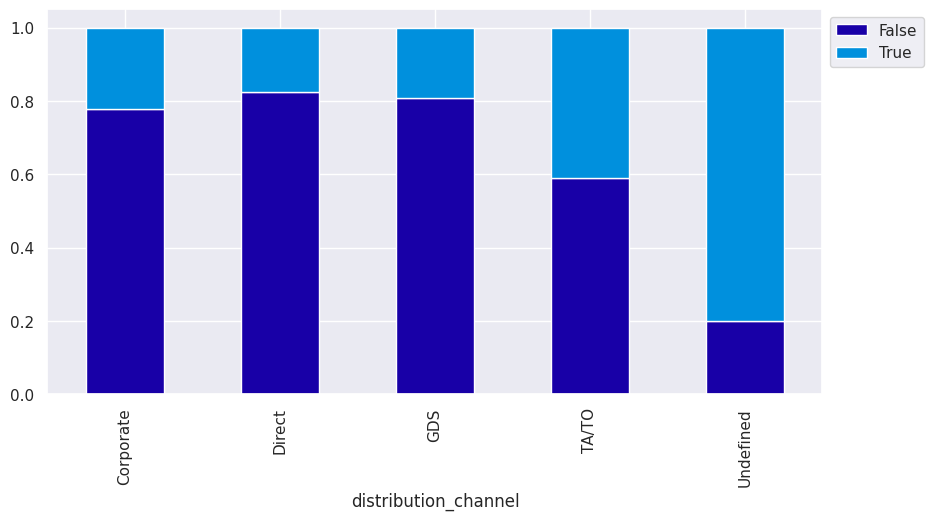

is_canceled        False   True     All
is_repeated_guest                      
False              71908  43671  115579
True                3258    372    3630
All                75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


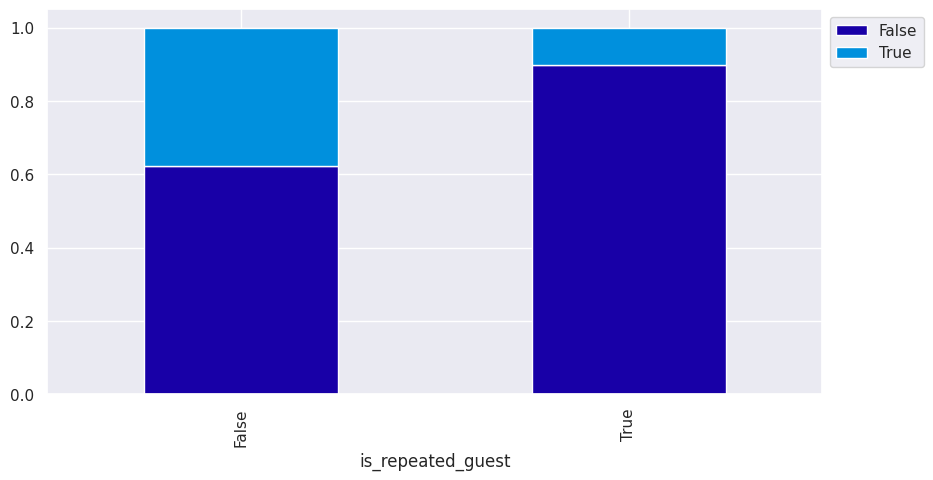

is_canceled         False   True     All
reserved_room_type                      
A                   52364  33449   85813
B                     750    368    1118
C                     624    308     932
D                   13099   6102   19201
E                    4621   1914    6535
F                    2017    880    2897
G                    1331    763    2094
H                     356    245     601
L                       4      2       6
P                       0     12      12
All                 75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


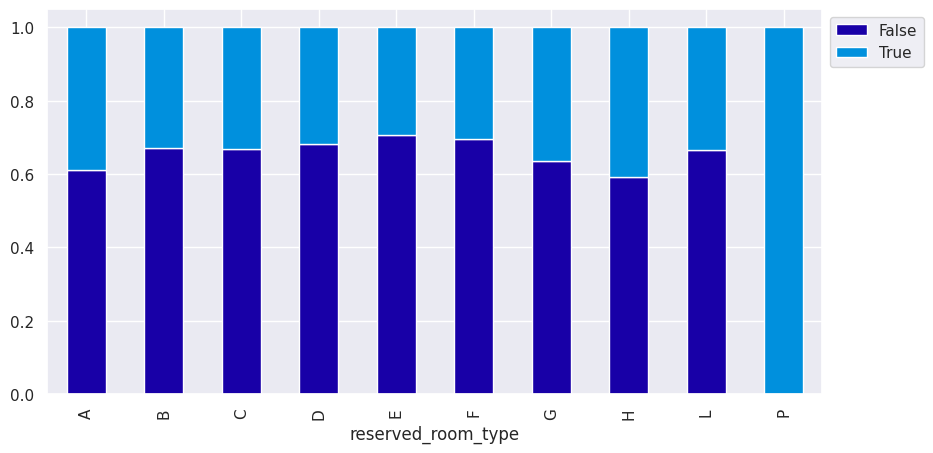

is_canceled   False   True     All
deposit_type                      
No Deposit    74947  29513  104460
Non Refund       93  14494   14587
Refundable      126     36     162
All           75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


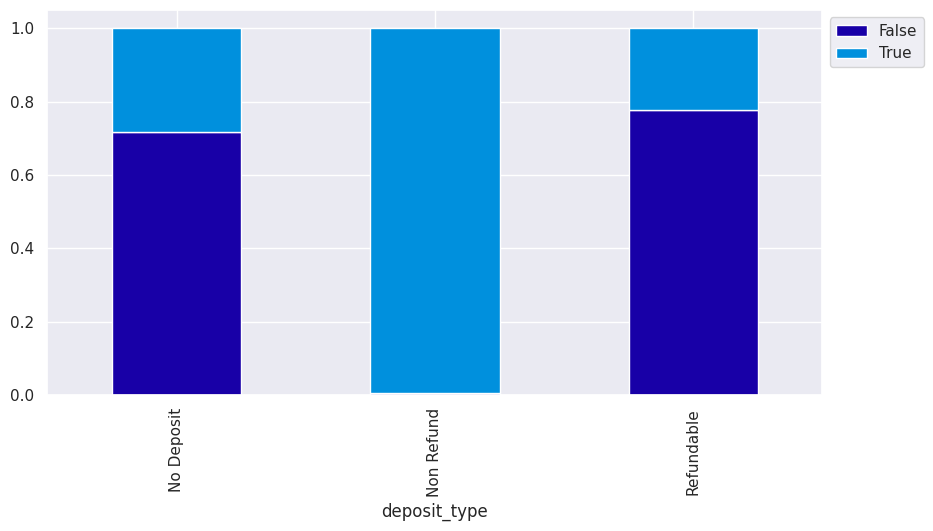

is_canceled      False   True     All
customer_type                        
Contract          2814   1262    4076
Group              518     59     577
Transient        53099  36513   89612
Transient-Party  18735   6209   24944
All              75166  44043  119209
------------------------------------------------------------------------------------------------------------------------


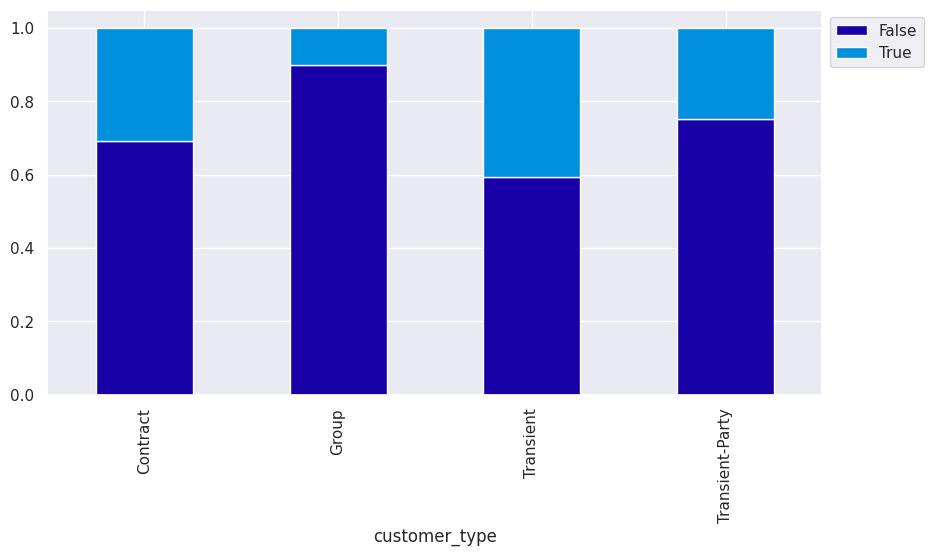

In [84]:
for i in ['hotel','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','deposit_type','customer_type']:
    stacked_plot(hotelBook[i])

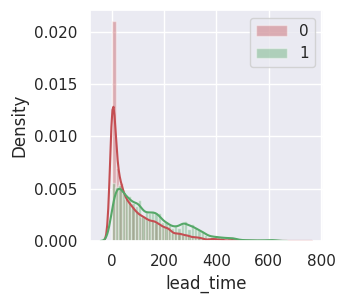

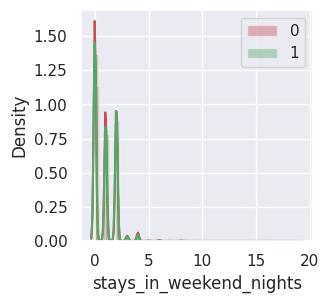

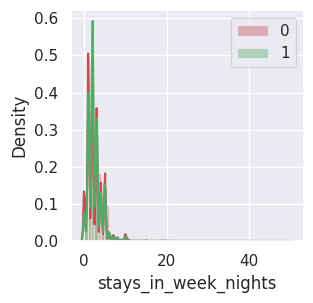

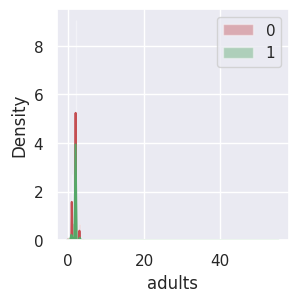

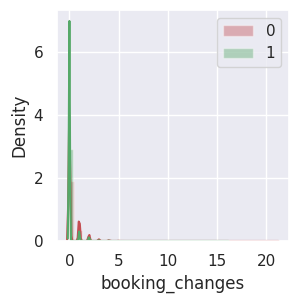

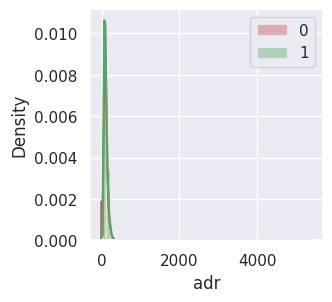

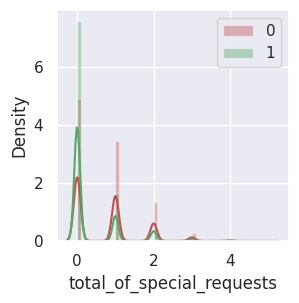

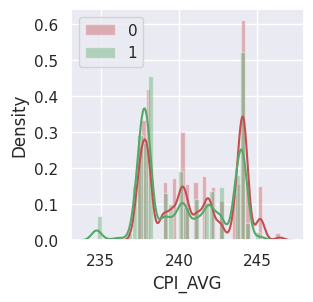

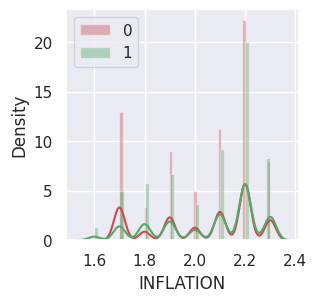

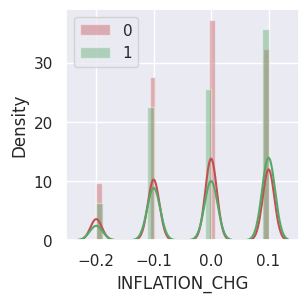

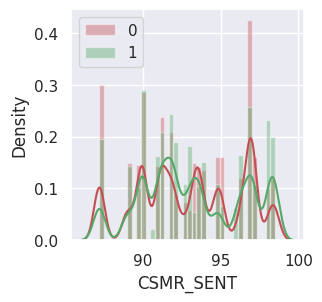

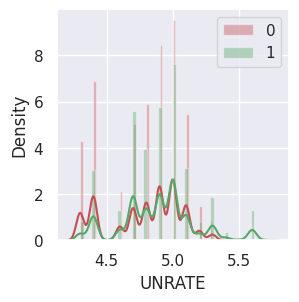

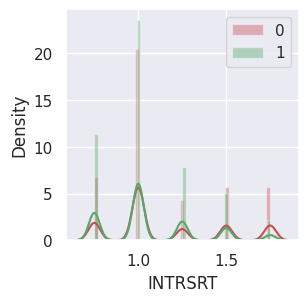

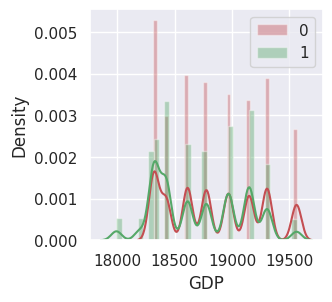

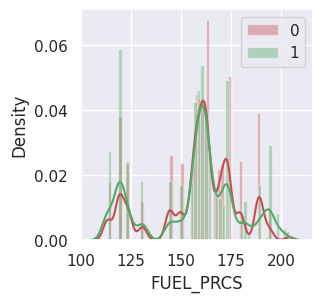

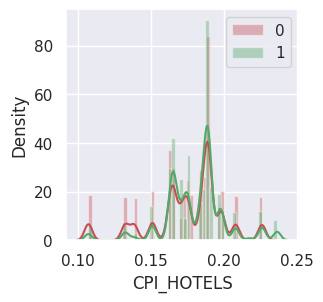

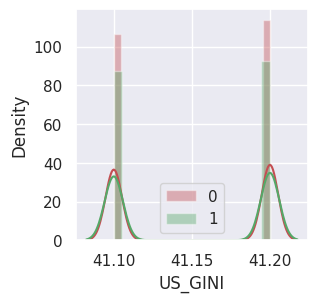

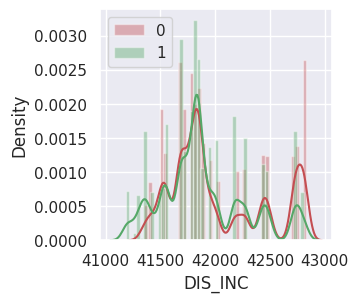

In [85]:
for i in  ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','booking_changes','adr','total_of_special_requests','CPI_AVG','INFLATION','INFLATION_CHG','CSMR_SENT','UNRATE','INTRSRT','GDP','FUEL_PRCS','CPI_HOTELS','US_GINI','DIS_INC']:
    sns.distplot(hotelBook[hotelBook['is_canceled']==0][i],color='r',label=0)
    sns.distplot(hotelBook[hotelBook['is_canceled']==1][i],color='g',label=1)
    plt.legend()
    plt.show()

In [86]:
# DROPPING COLUMNS WITH <0.02 CORRELATION
hotelBook.drop(columns = ['stays_in_weekend_nights', 'US_GINI'], axis=1, inplace=True)

# Delete highly imbalanced variable.
hotelBook.drop('is_repeated_guest', axis=1, inplace=True)

In [87]:
hotelBook.head()

hotel  is_canceled  lead_time  stays_in_week_nights  adults meal  \
0  False        False        342                     0       2   BB   
1  False        False        737                     0       2   BB   
2  False        False          7                     1       1   BB   
3  False        False         13                     1       1   BB   
4  False        False         14                     2       2   BB   

  market_segment distribution_channel reserved_room_type  booking_changes  \
0         Direct               Direct                  C                3   
1         Direct               Direct                  C                4   
2         Direct               Direct                  A                0   
3      Corporate            Corporate                  A                0   
4      Online TA                TA/TO                  A                0   

   ...  CPI_AVG INFLATION  INFLATION_CHG  CSMR_SENT  UNRATE  INTRSRT  \
0  ...  238.034       1.8            0.0       93.1     5.3     0.75   
1  ...  238.034       1.8            0.0       93.1     5.3     0.75   
2  ...  238.034       1.8            0.0       93.1     5.3     0.75   
3  ...  238.034       1.8            0.0       93.1     5.3     0.75   
4  ...  238.034       1.8            0.0       93.1     5.3     0.75   

        GDP  FUEL_PRCS  CPI_HOTELS  DIS_INC  
0  18306.96      194.0    0.187566  41355.0  
1  18306.96      194.0    0.187566  41355.0  
2  18306.96      194.0    0.187566  41355.0  
3  18306.96      194.0    0.187566  41355.0  
4  18306.96      194.0    0.187566  41355.0  

[5 rows x 24 columns]

##  Split data into train and test data

In [88]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (is_canceled) into Y array

x = hotelBook.loc[:, hotelBook.columns != 'is_canceled']  # independent variables

y = hotelBook.loc[:, hotelBook.columns == 'is_canceled']  # Target variable

In [89]:
x = pd.get_dummies(x,drop_first=True)

In [90]:
x.head()

hotel  lead_time  stays_in_week_nights  adults  booking_changes   adr  \
0  False        342                     0       2                3   0.0   
1  False        737                     0       2                4   0.0   
2  False          7                     1       1                0  75.0   
3  False         13                     1       1                0  75.0   
4  False         14                     2       2                0  98.0   

   total_of_special_requests  CPI_AVG  INFLATION  INFLATION_CHG  ...  \
0                          0  238.034        1.8            0.0  ...   
1                          0  238.034        1.8            0.0  ...   
2                          0  238.034        1.8            0.0  ...   
3                          0  238.034        1.8            0.0  ...   
4                          1  238.034        1.8            0.0  ...   

   reserved_room_type_F  reserved_room_type_G  reserved_room_type_H  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   reserved_room_type_L  reserved_room_type_P  deposit_type_Non Refund  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   deposit_type_Refundable  customer_type_Group  customer_type_Transient  \
0                        0                    0                        1   
1                        0                    0                        1   
2                        0                    0                        1   
3                        0                    0                        1   
4                        0                    0                        1   

   customer_type_Transient-Party  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 46 columns]

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=35)

### Base Model

In [92]:
model = LogisticRegression(random_state=35)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=35)

In [93]:
y_predict = model.predict(xtest)

print("Trainig accuracy",model.score(xtrain,ytrain))  #  training accuracy for data in xtrain
print()
print("Testing accuracy",model.score(xtest, ytest))   # testing accuracy for data in xtest

Trainig accuracy 0.6895910520796924

Testing accuracy 0.6927690629980706


### Confusion Matrix, Accuracy, Recall, Precision, F1Score and roc_auc_score

In [94]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

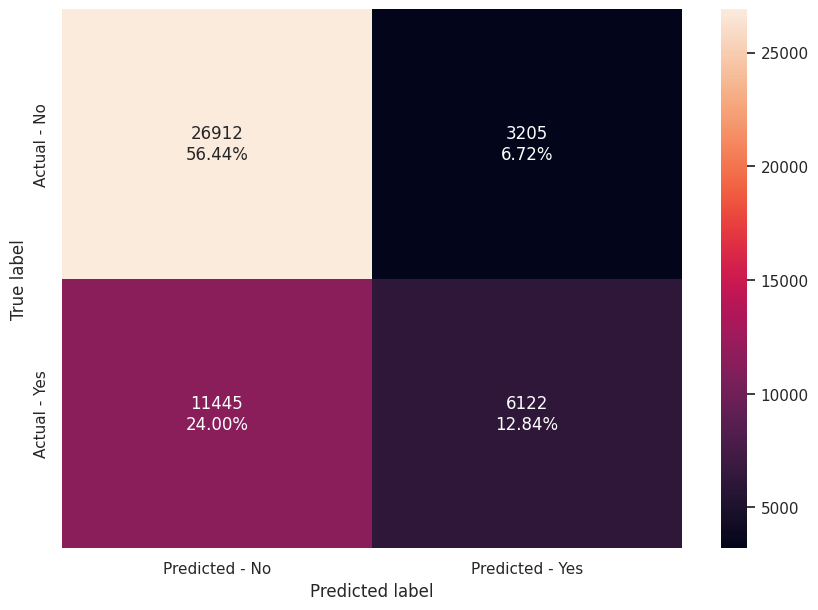

In [95]:
#Plot confusion matrix

draw_cm(ytest,y_predict)

In [96]:
# Recall value

recall_score(ytest,y_predict)

0.34849433597085444

In [97]:
# Precision

precision_score(ytest,y_predict)

0.656373968049748

In [98]:
# F1 score

f1_score(ytest,y_predict)

0.4552688331969955

In [99]:
# ROC AUC score

roc_auc_score(ytest,y_predict)

0.6210380170075741

In [100]:
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

Col  Coeff
14                       FUEL_PRCS   0.01
1                        lead_time   0.01
5                              adr   0.01
10                       CSMR_SENT   0.01
0                            hotel   0.00
27        market_segment_Undefined   0.00
28     distribution_channel_Direct   0.00
29        distribution_channel_GDS   0.00
30      distribution_channel_TA/TO   0.00
31  distribution_channel_Undefined   0.00
32            reserved_room_type_B   0.00
33            reserved_room_type_C   0.00
34            reserved_room_type_D   0.00
36            reserved_room_type_F   0.00
35            reserved_room_type_E   0.00
25    market_segment_Offline TA/TO   0.00
37            reserved_room_type_G   0.00
38            reserved_room_type_H   0.00
39            reserved_room_type_L   0.00
40            reserved_room_type_P   0.00
41         deposit_type_Non Refund   0.00
42         deposit_type_Refundable   0.00
43             customer_type_Group   0.00
44         customer_type_Transient   0.00
26        market_segment_Online TA   0.00
23           market_segment_Direct   0.00
24           market_segment_Groups   0.00
22        market_segment_Corporate   0.00
2             stays_in_week_nights   0.00
3                           adults   0.00
4                  booking_changes   0.00
6        total_of_special_requests   0.00
7                          CPI_AVG   0.00
8                        INFLATION   0.00
9                    INFLATION_CHG   0.00
11                          UNRATE   0.00
12                         INTRSRT   0.00
13                             GDP   0.00
15                      CPI_HOTELS   0.00
16                         DIS_INC   0.00
17                         meal_FB   0.00
18                         meal_HB   0.00
19                         meal_SC   0.00
20                  meal_Undefined   0.00
21    market_segment_Complementary   0.00
45   customer_type_Transient-Party   0.00

## How can the model perform better

